# Introduction

Today, cyber attacks have extensive impact on our daily lives.<br />
It can happen at work (phishing emails), at home - like smart devices and even on the train.
On average, per day there are over 10 million worldwide cyber attacks on infrastructure and network, and the number is increasing day by day. <br />
Can we predict where the next cyber-attack will be directed to?<br />
This project is trying to understand if it's possible to predict the next cyber-attack by collecting news from all over the world and analyze it.  
<br />

### Import packages:

In [1]:
!pip install psaw
import praw
from psaw import PushshiftAPI
nltk.download('punkt')

from bs4 import BeautifulSoup
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import html5lib
import warnings
import time
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from PIL import Image
%matplotlib inline
import sklearn
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

# 1. Scrapping The Data

After deep investigation, I decided to scrape the data from Reddit.com using Python Reddit API wrapper (PRAW). <br />
The website is divided to categories, they called subreddits and I used the worldwide category.<br />
I needed to create a bot to scrape news posts using the following website: https://www.reddit.com/prefs/apps <br />
I received client id, client secret and user agent and entered here:<br />

In [ ]:
api = PushshiftAPI()
reddit = praw.Reddit(
    client_id = "5NtLI8-knUqSxJ8iRJsv9A",
    client_secret = "VZAyKIERsbLkDfJMYCPmBUj4kZNRUQ",
    username = "Redit WebScrapping",
    user_agent = "my agent"
)

Now we can start scape all news posts from the subreddit "worldnews" <br />
I scrap from 01.2020 until 06.2022, per month to recieve the maximum data and saved it in Data Frame<br />

In [ ]:
subreddit = "worldnews"     
start_time = int(dt.datetime(2020, 1, 1).timestamp())                                     
end_time = int(dt.datetime(2020, 1, 31).timestamp())   
filters = []                     
limit = 50000                     

df_p = data_prep_posts(subreddit,start_time,end_time,filters,limit) 

df_p['datetime'] = df_p['created_utc'].map(lambda t: dt.datetime.fromtimestamp(t))
df_p = df_p.drop('created_utc', axis=1) 
                   
df_p = df_p.sort_values(by='datetime')  
                   
df_p["datetime"] = pd.to_datetime(df_p["datetime"])


def data_prep_posts(subreddit, start_time, end_time, filters, limit):
    if(len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'domain', 'url',
                   'title', 'num_comments']                 
                   
    posts = list(api.search_submissions(
        subreddit=subreddit,   
        after=start_time,      
        before=end_time,       
        filter=filters,        
        limit=limit))          

    return pd.DataFrame(posts) 
df_p
df_p.to_csv('./newsFromReddit_1_20.csv')

In [3]:
df_p = pd.read_csv('./newsFromReddit_1_20.csv')
df_p.head()

,Unnamed: 0,author,domain,id,num_comments,title,url,created,d_,datetime
0,23633,speakhyroglyphically,commondreams.org,ei9ic7,18,"Without Evidence, Trump Accuses Iran of 'Orche...",https://www.commondreams.org/news/2019/12/31/w...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:00:07
1,23632,LiterallyaDinosaur,bbc.co.uk,ei9j0c,8,Five-inch long cancer 'horn' removed from man'...,https://www.bbc.co.uk/news/uk-england-merseysi...,1.577819e+09,"{'author': 'LiterallyaDinosaur', 'created_utc'...",2020-01-01 00:01:32
2,23631,speakhyroglyphically,commondreams.org,ei9kan,0,NIAC Urges US-Iran Descalation in Iraq,https://www.commondreams.org/newswire/2019/12/...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:04:17
3,23630,Vegeta9001,cnbc.com,ei9m07,26,North Korean leader Kim Jong Un warns of ‘shoc...,https://www.cnbc.com/2019/12/31/north-korean-l...,1.577819e+09,"{'author': 'Vegeta9001', 'created_utc': 157783...",2020-01-01 00:08:12
4,23629,blueinagreenworld,voanews.com,ei9pd7,0,Navalny 'Completely Pessimistic' About Western...,https://www.voanews.com/europe/navalny-complet...,1.577820e+09,"{'author': 'blueinagreenworld', 'created_utc':...",2020-01-01 00:15:38


Now, merging all Data Frames to 1:

In [ ]:
news1_df =pd.read_csv('newsFromReddit_1_20.csv') 
news2_df =pd.read_csv('newsFromReddit_2_20.csv')
news3_df =pd.read_csv('newsFromReddit_3_20.csv')
news4_df =pd.read_csv('newsFromReddit_4_20.csv')
news5_df =pd.read_csv('newsFromReddit_5_20.csv')
news6_df =pd.read_csv('newsFromReddit_6_20.csv')
news7_df =pd.read_csv('newsFromReddit_7_20.csv')
news8_df =pd.read_csv('newsFromReddit_8_20.csv')
news9_df =pd.read_csv('newsFromReddit_9_20.csv')
news10_df =pd.read_csv('newsFromReddit_10_20.csv')
news11_df =pd.read_csv('newsFromReddit_11_20.csv')
news12_df =pd.read_csv('newsFromReddit_12_20.csv')

NewsMerged2020_df = pd.concat(map(pd.read_csv, ['newsFromReddit_1_20.csv', 'newsFromReddit_2_20.csv', 'newsFromReddit_3_20.csv','newsFromReddit_4_20.csv',
                                               'newsFromReddit_5_20.csv', 'newsFromReddit_6_20.csv','newsFromReddit_7_20.csv',
                                               'newsFromReddit_8_20.csv','newsFromReddit_9_20.csv', 'newsFromReddit_10_20.csv',
                                               'newsFromReddit_11_20.csv', 'newsFromReddit_12_20.csv']), ignore_index=True)
NewsMerged2020_df

In [4]:
NewsMerged2020_df = pd.read_csv('./newsMerged2020.csv')
NewsMerged2020_df.head()

,Unnamed: 0,Unnamed: 0.1,author,domain,id,num_comments,title,url,created,d_,datetime
0,0,23633,speakhyroglyphically,commondreams.org,ei9ic7,18,"Without Evidence, Trump Accuses Iran of 'Orche...",https://www.commondreams.org/news/2019/12/31/w...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:00:07
1,1,23632,LiterallyaDinosaur,bbc.co.uk,ei9j0c,8,Five-inch long cancer 'horn' removed from man'...,https://www.bbc.co.uk/news/uk-england-merseysi...,1.577819e+09,"{'author': 'LiterallyaDinosaur', 'created_utc'...",2020-01-01 00:01:32
2,2,23631,speakhyroglyphically,commondreams.org,ei9kan,0,NIAC Urges US-Iran Descalation in Iraq,https://www.commondreams.org/newswire/2019/12/...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:04:17
3,3,23630,Vegeta9001,cnbc.com,ei9m07,26,North Korean leader Kim Jong Un warns of ‘shoc...,https://www.cnbc.com/2019/12/31/north-korean-l...,1.577819e+09,"{'author': 'Vegeta9001', 'created_utc': 157783...",2020-01-01 00:08:12
4,4,23629,blueinagreenworld,voanews.com,ei9pd7,0,Navalny 'Completely Pessimistic' About Western...,https://www.voanews.com/europe/navalny-complet...,1.577820e+09,"{'author': 'blueinagreenworld', 'created_utc':...",2020-01-01 00:15:38


After Merging, I checked if i have duplicates in the Dataframe and deleted them to create clean dataframe: 

In [5]:
NewsMerged2020_df.title.value_counts()

Without Evidence, Trump Accuses Iran of 'Orchestrating an Attack' on US Embassy in Iraq as Fears of War Grow                                                                                                                       1
WestJet passengers who refuse to wear mask could face 12-month travel ban, airline says                                                                                                                                            1
Nono óbito por Covid-19 é registrado em Taquaritinga (SP)                                                                                                                                                                          1
Taquaritinga se despede do advogado e historiador Dr. Milve Peria                                                                                                                                                                  1
Taiwan relaxes restrictions on American pork and beef imports, will now import US me

In [6]:
NewsMerged2020_df.title.value_counts()

Without Evidence, Trump Accuses Iran of 'Orchestrating an Attack' on US Embassy in Iraq as Fears of War Grow                                                                                                                       1
WestJet passengers who refuse to wear mask could face 12-month travel ban, airline says                                                                                                                                            1
Nono óbito por Covid-19 é registrado em Taquaritinga (SP)                                                                                                                                                                          1
Taquaritinga se despede do advogado e historiador Dr. Milve Peria                                                                                                                                                                  1
Taiwan relaxes restrictions on American pork and beef imports, will now import US me

Saving the dataframe:

In [8]:
bool_ser = NewsMerged2020_df.duplicated(subset=['title'])
NewsMerged2020_df = NewsMerged2020_df[~bool_ser]
NewsMerged2020_df.to_csv('./newsMerged2020.csv')
NewsMerged2020_df.head()

,Unnamed: 0,Unnamed: 0.1,author,domain,id,num_comments,title,url,created,d_,datetime
0,0,23633,speakhyroglyphically,commondreams.org,ei9ic7,18,"Without Evidence, Trump Accuses Iran of 'Orche...",https://www.commondreams.org/news/2019/12/31/w...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:00:07
1,1,23632,LiterallyaDinosaur,bbc.co.uk,ei9j0c,8,Five-inch long cancer 'horn' removed from man'...,https://www.bbc.co.uk/news/uk-england-merseysi...,1.577819e+09,"{'author': 'LiterallyaDinosaur', 'created_utc'...",2020-01-01 00:01:32
2,2,23631,speakhyroglyphically,commondreams.org,ei9kan,0,NIAC Urges US-Iran Descalation in Iraq,https://www.commondreams.org/newswire/2019/12/...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:04:17
3,3,23630,Vegeta9001,cnbc.com,ei9m07,26,North Korean leader Kim Jong Un warns of ‘shoc...,https://www.cnbc.com/2019/12/31/north-korean-l...,1.577819e+09,"{'author': 'Vegeta9001', 'created_utc': 157783...",2020-01-01 00:08:12
4,4,23629,blueinagreenworld,voanews.com,ei9pd7,0,Navalny 'Completely Pessimistic' About Western...,https://www.voanews.com/europe/navalny-complet...,1.577820e+09,"{'author': 'blueinagreenworld', 'created_utc':...",2020-01-01 00:15:38


Heat map to check NULL values:

<AxesSubplot:>

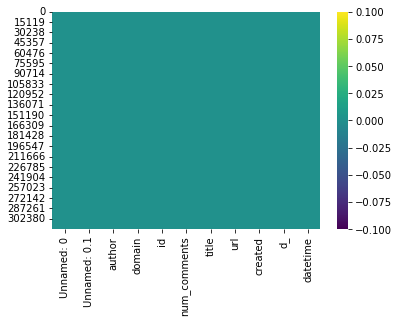

In [9]:
## Searching for nan cols ##
sns.heatmap(NewsMerged2020_df.isnull(), cmap='viridis')

I notice that I have non-ASCII characters in the title column, so I removed them and saved the file:

In [10]:
NewsMerged2020_df = NewsMerged2020_df[NewsMerged2020_df['title'].map(lambda x: x.isascii())]
NewsMerged2020_df.to_csv('./newsMerged2020_copy.csv')
NewsMerged2020_df.head()

,Unnamed: 0,Unnamed: 0.1,author,domain,id,num_comments,title,url,created,d_,datetime
0,0,23633,speakhyroglyphically,commondreams.org,ei9ic7,18,"Without Evidence, Trump Accuses Iran of 'Orche...",https://www.commondreams.org/news/2019/12/31/w...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:00:07
1,1,23632,LiterallyaDinosaur,bbc.co.uk,ei9j0c,8,Five-inch long cancer 'horn' removed from man'...,https://www.bbc.co.uk/news/uk-england-merseysi...,1.577819e+09,"{'author': 'LiterallyaDinosaur', 'created_utc'...",2020-01-01 00:01:32
2,2,23631,speakhyroglyphically,commondreams.org,ei9kan,0,NIAC Urges US-Iran Descalation in Iraq,https://www.commondreams.org/newswire/2019/12/...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:04:17
4,4,23629,blueinagreenworld,voanews.com,ei9pd7,0,Navalny 'Completely Pessimistic' About Western...,https://www.voanews.com/europe/navalny-complet...,1.577820e+09,"{'author': 'blueinagreenworld', 'created_utc':...",2020-01-01 00:15:38
5,5,23628,hedvigsnow,cnet.com,ei9q2s,2,Uber effort to kill California's AB 5 gig work...,https://www.cnet.com/news/uber-effort-to-kill-...,1.577820e+09,"{'author': 'hedvigsnow', 'created_utc': 157783...",2020-01-01 00:17:12


Merging all 2021 news which were scrapped with the above code with the function 'data_prep_posts':

In [ ]:
news1_df =pd.read_csv('newsFromReddit_1_21.csv') 
news2_df =pd.read_csv('newsFromReddit_2_21.csv')
news3_df =pd.read_csv('newsFromReddit_3_21.csv')
news4_df =pd.read_csv('newsFromReddit_4_21.csv')
news5_df =pd.read_csv('newsFromReddit_5_21.csv')
news6_df =pd.read_csv('newsFromReddit_6_21.csv')
news7_df =pd.read_csv('newsFromReddit_7_21.csv')
news8_df =pd.read_csv('newsFromReddit_8_21.csv')
news9_df =pd.read_csv('newsFromReddit_9_21.csv')
news10_df =pd.read_csv('newsFromReddit_10_21.csv')
news11_df =pd.read_csv('newsFromReddit_11_21.csv')
news12_df =pd.read_csv('newsFromReddit_12_21.csv')

NewsMerged2021_df = pd.concat(map(pd.read_csv, ['newsFromReddit_1_21.csv', 'newsFromReddit_2_21.csv', 'newsFromReddit_3_21.csv','newsFromReddit_4_21.csv',
                                               'newsFromReddit_5_21.csv', 'newsFromReddit_6_21.csv','newsFromReddit_7_21.csv',
                                               'newsFromReddit_8_21.csv','newsFromReddit_9_21.csv', 'newsFromReddit_10_21.csv',
                                               'newsFromReddit_11_21.csv', 'newsFromReddit_12_21.csv']), ignore_index=True)
NewsMerged2021_df

Removing Duplicates, special characters and save in to csv file:

In [ ]:
NewsMerged2021_df.title.value_counts()

In [ ]:
bool_ser = NewsMerged2021_df.duplicated(subset=['title'])
NewsMerged2021_df = NewsMerged2021_df[~bool_ser]
NewsMerged2021_df.to_csv('./newsMerged2021.csv')
NewsMerged2021_df

In [ ]:
sns.heatmap(NewsMerged2021_df.isnull(), cmap='viridis')

In [ ]:
## Remove special chracters ##
NewsMerged2021_df = NewsMerged2021_df.loc[NewsMerged2021_df['title'].str.contains(r'[^\x00-\x7F]+') == False]
NewsMerged2021_df.to_csv('./newsMerged2021.csv')
NewsMerged2021_df

Same as news from 2022:

In [ ]:
news1_df =pd.read_csv('newsFromReddit_1_22.csv') 
news2_df =pd.read_csv('newsFromReddit_2_22.csv')
news3_df =pd.read_csv('newsFromReddit_3_22.csv')
news4_df =pd.read_csv('newsFromReddit_4_22.csv')
news5_df =pd.read_csv('newsFromReddit_5_22.csv')
news6_df =pd.read_csv('newsFromReddit_6_22.csv')

NewsMerged2022_df = pd.concat(map(pd.read_csv, ['newsFromReddit_1_22.csv', 'newsFromReddit_2_22.csv', 'newsFromReddit_3_22.csv','newsFromReddit_4_21.csv',
                                               'newsFromReddit_5_22.csv', 'newsFromReddit_6_22.csv']), ignore_index=True)
NewsMerged2022_df

In [ ]:
NewsMerged2022_df.title.value_counts()

In [ ]:
bool_ser = NewsMerged2022_df.duplicated(subset=['title'])
NewsMerged2022_df = NewsMerged2022_df[~bool_ser]
NewsMerged2022_df

In [ ]:
sns.heatmap(NewsMerged2022_df.isnull(), cmap='viridis')

In [ ]:
NewsMerged2022_df[NewsMerged2022_df['title'].map(lambda x: x.isascii())]
NewsMerged2022_df.to_csv('./newsMerged2022.csv')

Now, after we have all the news from years 2020-2022, I'll create 1 merged dataframe containing all the news posts:

In [11]:
news1_df =pd.read_csv('newsMerged2020.csv') 
news2_df =pd.read_csv('newsMerged2021.csv')
news3_df =pd.read_csv('newsMerged2022.csv')

allnewsMerged20_22_df = pd.concat(map(pd.read_csv, ['newsMerged2020.csv', 'newsMerged2021.csv', 'newsMerged2022.csv']), ignore_index=True)
allnewsMerged20_22_df

,Unnamed: 0,Unnamed: 0.1,author,domain,id,num_comments,title,url,created,d_,datetime
0,0,23633,speakhyroglyphically,commondreams.org,ei9ic7,18,"Without Evidence, Trump Accuses Iran of 'Orche...",https://www.commondreams.org/news/2019/12/31/w...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:00:07
1,1,23632,LiterallyaDinosaur,bbc.co.uk,ei9j0c,8,Five-inch long cancer 'horn' removed from man'...,https://www.bbc.co.uk/news/uk-england-merseysi...,1.577819e+09,"{'author': 'LiterallyaDinosaur', 'created_utc'...",2020-01-01 00:01:32
2,2,23631,speakhyroglyphically,commondreams.org,ei9kan,0,NIAC Urges US-Iran Descalation in Iraq,https://www.commondreams.org/newswire/2019/12/...,1.577819e+09,"{'author': 'speakhyroglyphically', 'created_ut...",2020-01-01 00:04:17
3,3,23630,Vegeta9001,cnbc.com,ei9m07,26,North Korean leader Kim Jong Un warns of ‘shoc...,https://www.cnbc.com/2019/12/31/north-korean-l...,1.577819e+09,"{'author': 'Vegeta9001', 'created_utc': 157783...",2020-01-01 00:08:12
4,4,23629,blueinagreenworld,voanews.com,ei9pd7,0,Navalny 'Completely Pessimistic' About Western...,https://www.voanews.com/europe/navalny-complet...,1.577820e+09,"{'author': 'blueinagreenworld', 'created_utc':...",2020-01-01 00:15:38
...,...,...,...,...,...,...,...,...,...,...,...
610222,119285,5,Bushy_Babushka,msn.com,vknyij,0,A Colorado officer has been sued for fatally s...,https://www.msn.com/en-us/news/crime/a-colorad...,1.656179e+09,"{'author': 'Bushy_Babushka', 'created_utc': 16...",2022-06-25 23:43:01
610223,119287,3,Arpith2019,insider.com,vko12b,0,Ukrainian Top Military Spy Says Putin Has Less...,https://www.insider.com/ukrainian-military-spy...,1.656179e+09,"{'author': 'Arpith2019', 'created_utc': 165618...",2022-06-25 23:46:32
610224,119288,2,green_flash,al-monitor.com,vko7ss,0,Egypt and Russia seek to switch to local curre...,https://www.al-monitor.com/originals/2022/06/e...,1.656180e+09,"{'author': 'green_flash', 'created_utc': 16561...",2022-06-25 23:55:38
610225,119289,1,Picture-unrelated,nypost.com,vko9sc,1,Russian ally Belarus unleashes rocket air stri...,https://nypost.com/2022/06/25/russian-ally-bel...,1.656180e+09,"{'author': 'Picture-unrelated', 'created_utc':...",2022-06-25 23:58:24


### Cleaning the data

Checking for duplicates, and dropping unnecessary columns: 

In [12]:
allnewsMerged20_22_df.title.value_counts()

Burn your bra and join the revolution (41 Photos)                                                                                                                                                                              3
Michael Atkinson: Trump fires intelligence chief involved in impeachment - US President Donald Trump has fired a senior official who first alerted Congress to a whistleblower complaint that led to his impeachment trial.    3
Borris Johnson taken into intensive care                                                                                                                                                                                       3
Plasma from coronavirus survivors found to help severely ill patients, study shows                                                                                                                                             3
Help                                                                                                

In [13]:
bool_ser = allnewsMerged20_22_df.duplicated(subset=['title'])
allnewsMerged20_22_df = allnewsMerged20_22_df[~bool_ser]
allnewsMerged20_22_df[allnewsMerged20_22_df['title'].map(lambda x: x.isascii())]
allnewsMerged20_22_df = allnewsMerged20_22_df.drop(['Unnamed: 0.1','Unnamed: 0', 'd_'], axis=1)
allnews_no_dup = allnewsMerged20_22_df[~allnewsMerged20_22_df.duplicated()]
allnews_no_dup.to_csv('./allnews_20_22.csv')
allnews_no_dup

,author,domain,id,num_comments,title,url,created,datetime
0,speakhyroglyphically,commondreams.org,ei9ic7,18,"Without Evidence, Trump Accuses Iran of 'Orche...",https://www.commondreams.org/news/2019/12/31/w...,1.577819e+09,2020-01-01 00:00:07
1,LiterallyaDinosaur,bbc.co.uk,ei9j0c,8,Five-inch long cancer 'horn' removed from man'...,https://www.bbc.co.uk/news/uk-england-merseysi...,1.577819e+09,2020-01-01 00:01:32
2,speakhyroglyphically,commondreams.org,ei9kan,0,NIAC Urges US-Iran Descalation in Iraq,https://www.commondreams.org/newswire/2019/12/...,1.577819e+09,2020-01-01 00:04:17
3,Vegeta9001,cnbc.com,ei9m07,26,North Korean leader Kim Jong Un warns of ‘shoc...,https://www.cnbc.com/2019/12/31/north-korean-l...,1.577819e+09,2020-01-01 00:08:12
4,blueinagreenworld,voanews.com,ei9pd7,0,Navalny 'Completely Pessimistic' About Western...,https://www.voanews.com/europe/navalny-complet...,1.577820e+09,2020-01-01 00:15:38
...,...,...,...,...,...,...,...,...
610222,Bushy_Babushka,msn.com,vknyij,0,A Colorado officer has been sued for fatally s...,https://www.msn.com/en-us/news/crime/a-colorad...,1.656179e+09,2022-06-25 23:43:01
610223,Arpith2019,insider.com,vko12b,0,Ukrainian Top Military Spy Says Putin Has Less...,https://www.insider.com/ukrainian-military-spy...,1.656179e+09,2022-06-25 23:46:32
610224,green_flash,al-monitor.com,vko7ss,0,Egypt and Russia seek to switch to local curre...,https://www.al-monitor.com/originals/2022/06/e...,1.656180e+09,2022-06-25 23:55:38
610225,Picture-unrelated,nypost.com,vko9sc,1,Russian ally Belarus unleashes rocket air stri...,https://nypost.com/2022/06/25/russian-ally-bel...,1.656180e+09,2022-06-25 23:58:24


In [14]:
allnews_no_dup.describe()

,num_comments,created
count,588982.000000,5.889820e+05
mean,28.533733,1.610950e+09
std,319.055120,2.155087e+07
min,0.000000,1.577819e+09
25%,0.000000,1.593001e+09
50%,0.000000,1.607565e+09
75%,2.000000,1.626686e+09
max,44767.000000,1.656180e+09


In [15]:
allnews_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588982 entries, 0 to 610226
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        588982 non-null  object 
 1   domain        588982 non-null  object 
 2   id            588982 non-null  object 
 3   num_comments  588982 non-null  int64  
 4   title         588982 non-null  object 
 5   url           588982 non-null  object 
 6   created       588982 non-null  float64
 7   datetime      588982 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.4+ MB


I found a lot of unnecessary domains, so I want to drop all the rows containing the domains:

In [17]:
drop_domains=['10bestgoods.com','[imgur](https'
,'1000cuorirossoblu.it'
,'10kreview.com'
,'123-hd.com'
,'139.162.32.84'
,'157.230.99.36'
,'1888pressrelease.com'
,'1dietplan.com'
,'18650batterystore.com'
,'1home.io'
,'1stproducts.com'
,'2255.pe.hu'
,'24smartphones.com'
,'24to7mac.com'
,'34qko.blogspot.com'
,'30stades.com'
,'360ngmedia.com'
,'360ng.net'
,'360igym.com'
,'3dprintingmedia.network'
,'420kushdispensary.xyz'
,'4h.net'
,'44four.us'
,'420kushlife.com'
,'4elegancebeauty.com'
,'4ufreeclassifiedads.com'
,'4w.pub'
,'4humor12.com'
,'4vultures.org'
,'4shp.com'
,'5gappeal.eu'
,'5ec870c4f2ee0.site123.me'
,'710keel.com'
,'7thnews.com'
,'925galleria.com'
,'8kmiles.com'
,'8newsnow.com'
,'9gag.com'
,'99question.com'
,'99ringtones.com'
,'9atoa.in'
,'9creation-singapore.blogspot.com'
,'9jahousee.blogspot.com'
,'a.vfghd.com'
,'9to5mac.com'
,'a2zinformations.com'
,'technologyhindijankari.blogspot.com'
,'youtube.com'
,'zyvago.com'
,'zulqarnainbharwana.com'
,'zoomproperty.com'
,'zooinfotech.com'
,'zoo.family'
,'zonenews-24.com'
,'zmamen.com'
,'zkylinks.xyz'
,'ziyyara.in'
,'zivallo.pk'
,'zirango.in'
,'zippyjot.com'
,'zippy.isolic.net'
,'zippiesfun.tumblr.com'
,'zhlicense.com'
,'zerofour.ae'
,'zen.yandex.ru'
,'zen.me'
,'zegadgets.com'
,'zeeshealth.com'
,'zeep.ly'
,'zedilaces.com'
,'zavzaseal.com'
,'zapbox.in'
,'zaobao.com.sg'
,'zakiribrahim.com'
,'zaibcrack.com'
,'zahretelarab.blogspot.com'
,'zacks.com'
,'za.uy'
,'yt6.pics.ee'
,'yoback-stretch-your-back.kckb.st'
,'yourworldoutdoorblindsandshutters.wordpress.com'
,'yournewzz.com'
,'yourinfomedia.com'
,'youmaker.com'
,'youlyrics1.blogspot.com'
,'yodoozy.com'
,'www.gggogle.com'
,'wsu.co1.qualtrics.com'
,'wrtechnotel.blogspot.com'
,'writechannels.wordpress.com'
,'worldwidejobsportal.com'
,'worldofrath.com'
,'worldofmolecules.com'
,'worldoffashionista.com'
,'winipple.com'
,'wildfly.org'
,'wildfly.com.ng'
,'wikyi.com'
,'104.248.241.62'
,'18.180.220.14'
,'178.128.217.100'
,'192.64.117.15','100acress.com','112vdg.nl', '123articleonline.com', '12dakika.com','139.59.225.9','147.135.54.83','149entertainmentss.blogspot.com',
 '15-minute-manifestation-review.medium.com', '1800-gifts.com','193states.space','1997-2001.state.gov','1drv.ms'
,'1news0world0.blogspot.com'
,'1udryr.wixsite.com'
,'1un.fr'
,'2012portal.blogspot.com'
,'2014weightloss.com'
,'2020electioncenter.com'
,'247techclub.blogspot.com']

allnews_no_dup = allnews_no_dup[allnews_no_dup.domain.isin(drop_domains) == False]
allnews_no_dup.to_csv('./allnews_20_22.csv')
len(allnews_no_dup)

575878

In [19]:
allnews_no_dup['word_count'] = allnews_no_dup['title'].apply(lambda x : len(x.split()))
allnews_no_dup['char_count'] = allnews_no_dup['title'].apply(lambda x: len(x))
allnews_no_dup.to_csv('./allnews_20_22.csv')
allnews_no_dup.head()

,author,domain,id,num_comments,title,url,created,datetime,word_count,char_count
0,speakhyroglyphically,commondreams.org,ei9ic7,18,"Without Evidence, Trump Accuses Iran of 'Orche...",https://www.commondreams.org/news/2019/12/31/w...,1.577819e+09,2020-01-01 00:00:07,19,108
1,LiterallyaDinosaur,bbc.co.uk,ei9j0c,8,Five-inch long cancer 'horn' removed from man'...,https://www.bbc.co.uk/news/uk-england-merseysi...,1.577819e+09,2020-01-01 00:01:32,8,52
2,speakhyroglyphically,commondreams.org,ei9kan,0,NIAC Urges US-Iran Descalation in Iraq,https://www.commondreams.org/newswire/2019/12/...,1.577819e+09,2020-01-01 00:04:17,6,38
3,Vegeta9001,cnbc.com,ei9m07,26,North Korean leader Kim Jong Un warns of ‘shoc...,https://www.cnbc.com/2019/12/31/north-korean-l...,1.577819e+09,2020-01-01 00:08:12,13,80
4,blueinagreenworld,voanews.com,ei9pd7,0,Navalny 'Completely Pessimistic' About Western...,https://www.voanews.com/europe/navalny-complet...,1.577820e+09,2020-01-01 00:15:38,9,74


### Outliers: <br />
By using the 'char_count' column, I will delete all outliers:

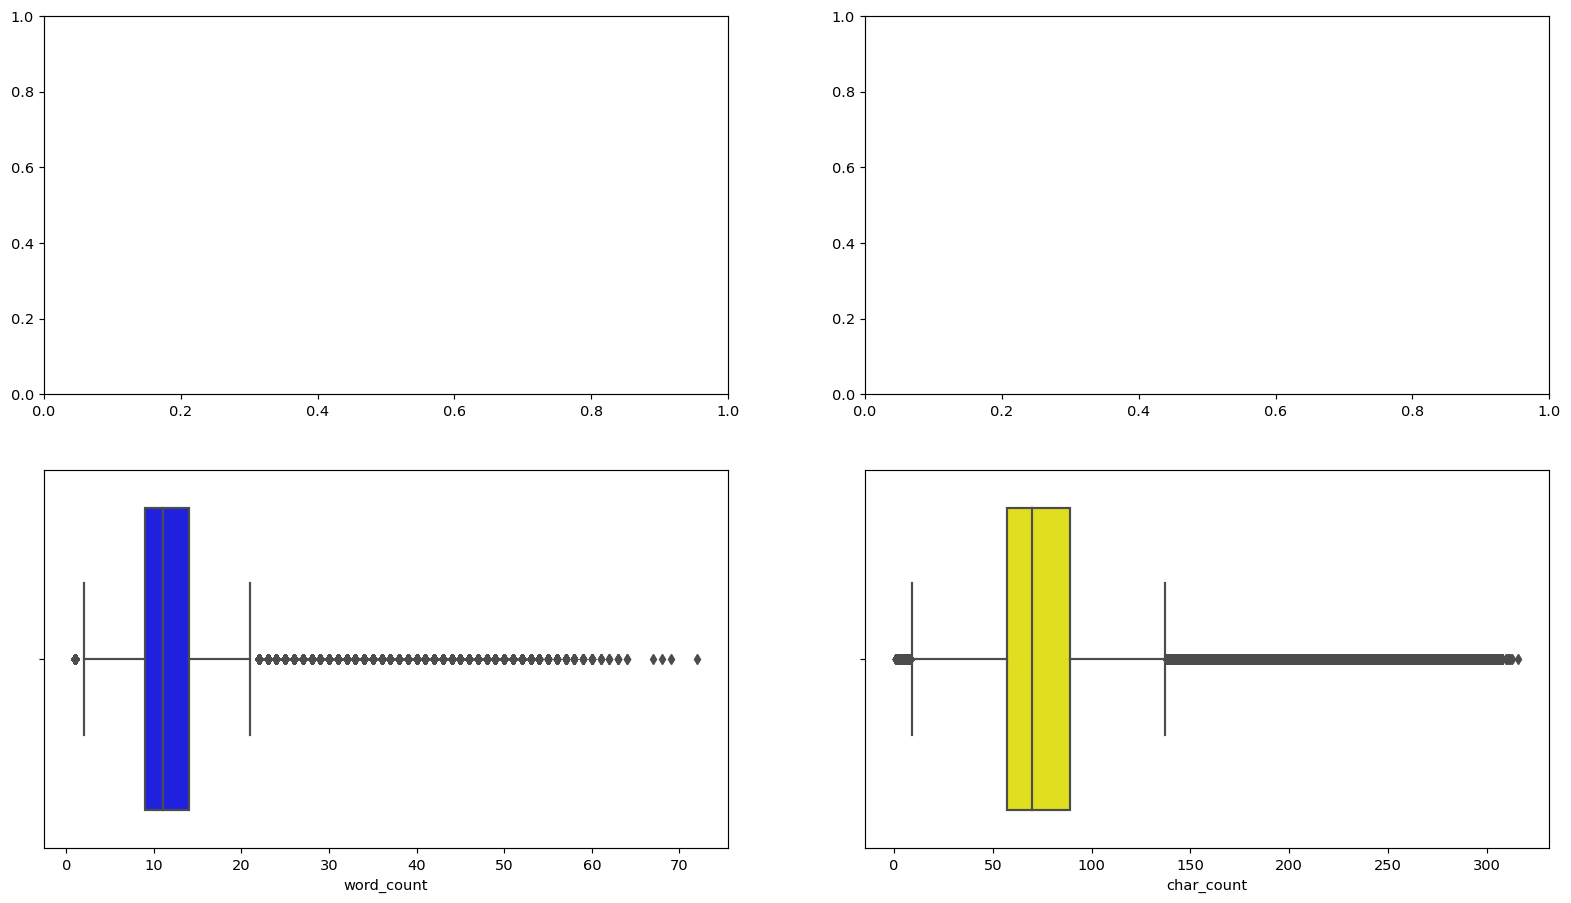

In [24]:
fig, ax = plt.subplots(2, 2)
sns.boxplot(x=allnews_no_dup.word_count, ax=ax[1, 0], color='blue')
sns.boxplot(x=allnews_no_dup.char_count, ax=ax[1, 1], color='yellow')
fig.set_size_inches(18.5, 10.5, forward=True)
fig.set_dpi(105)

In [26]:
df_copy = allnews_no_dup.copy()
Q1 = np.percentile(df_copy['char_count'],25)
Q3 = np.percentile(df_copy['char_count'],75)
IQR = Q3 - Q1
outliers_index = df_copy[(df_copy['char_count'] < Q1 - 1.5*IQR) | (df_copy['char_count'] > Q3 + 1.5*IQR)].index
df_copy.drop(outliers_index, axis=0, inplace=True)
df_copy.to_csv('./allnews_20_22_copy.csv')
len(df_copy)

530505

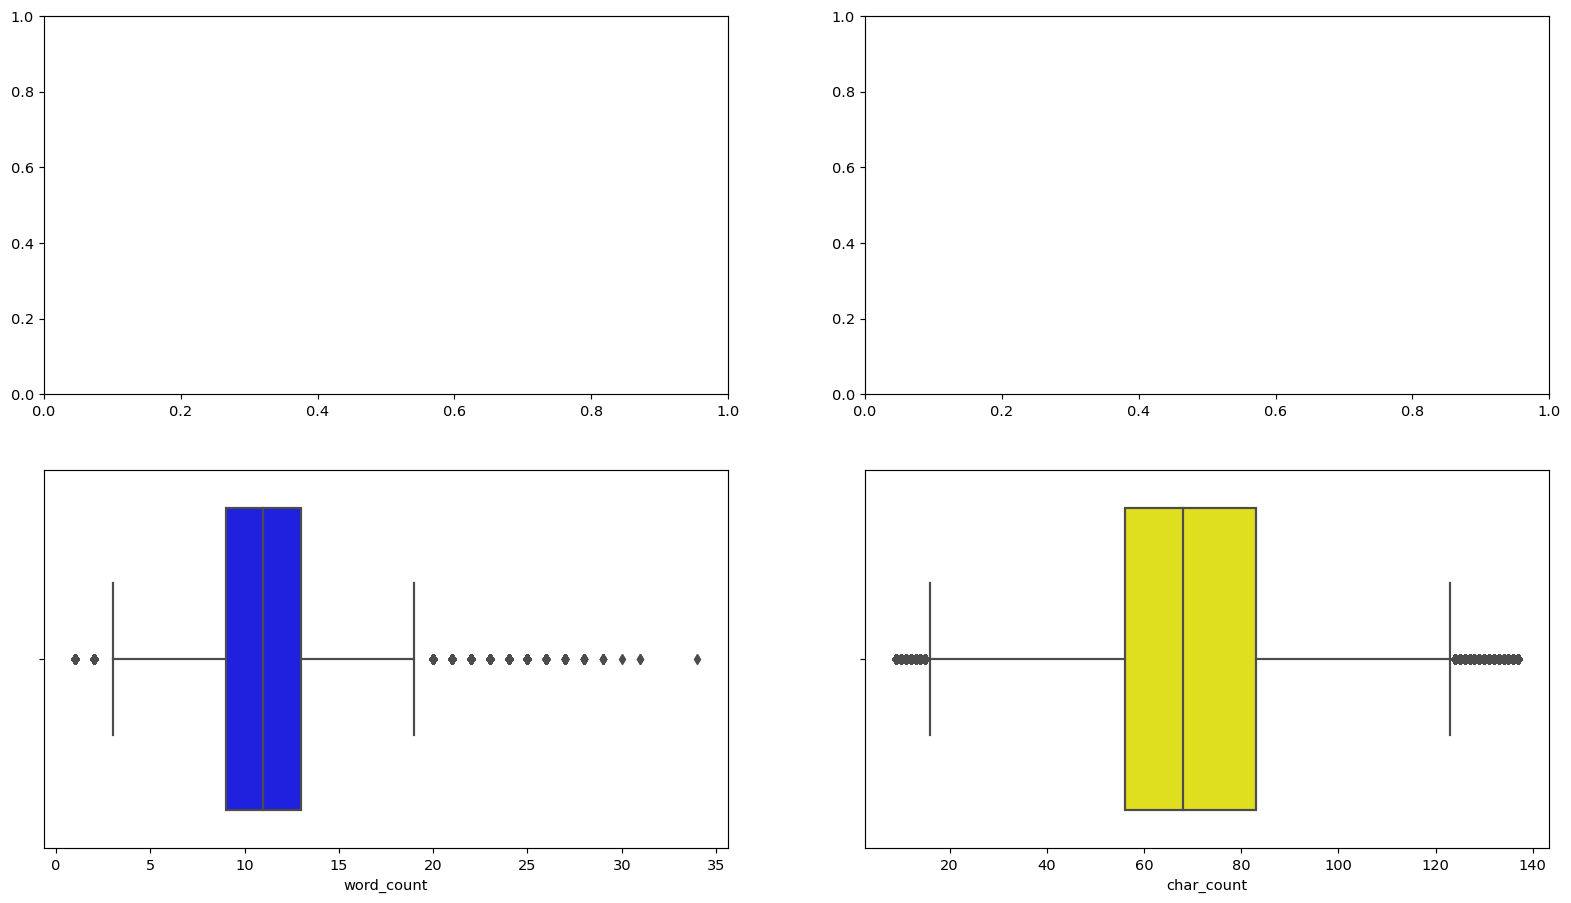

In [29]:
fig, ax = plt.subplots(2, 2)
sns.boxplot(x=df_copy.word_count, ax=ax[1, 0], color='blue')
sns.boxplot(x=df_copy.char_count, ax=ax[1, 1], color='yellow')
fig.set_size_inches(18.5, 10.5, forward=True)
fig.set_dpi(105)

Creating pie and hist plot to see how many news per year:

In [30]:
lstDate = []
yrd = []
lstDate = df_copy['datetime'].tolist()
for i in range(len(lstDate)):
    yrd.append(lstDate[i][:10])
df_copy['datetime'] = yrd

lstTime = []
yr = []
lstTime = df_copy['datetime'].tolist()
for i in range(len(lstTime)):
    yr.append(lstTime[i][:4])
df_copy['Year'] = yr
# df_copy

Text(0.5, 1.0, 'Divided by percentages')

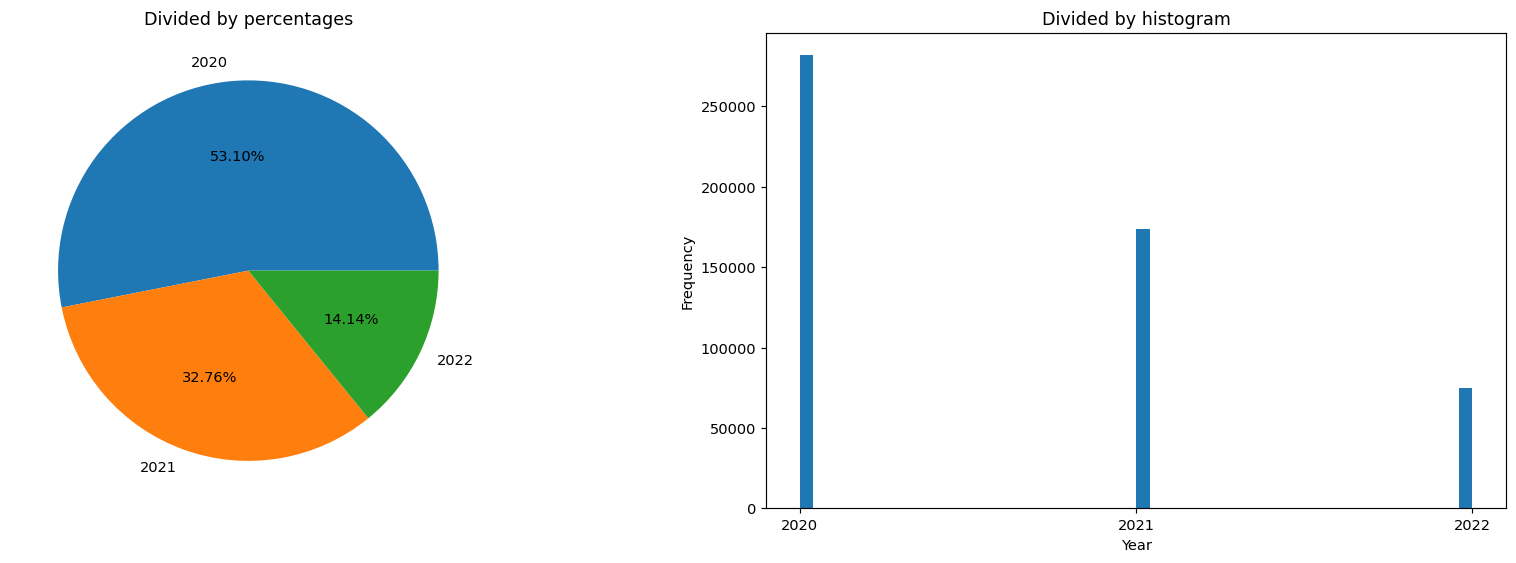

In [32]:
fig_year = plt.figure(figsize=(20, 6), dpi=105)
fig_pie = fig_year.add_subplot(121)
fig_hist = fig_year.add_subplot(122)
fig_hist.hist(df_copy.Year,bins=50)
year_values = df_copy.Year.value_counts()
fig_hist.set_title("Divided by histogram")
fig_hist.set_xlabel('Year')
fig_hist.set_ylabel('Frequency')
fig_pie.pie(year_values,labels=year_values.index,autopct='%1.2f%%')
fig_pie.set_title("Divided by percentages")

#### Now I will turn the text using CountVectorizer from Sklearn to Matrix

In [36]:
lst_words=[]
lst_val=[]
vectorizer = CountVectorizer(lowercase=True,stop_words="english",max_features=20)
X = vectorizer.fit_transform(df_copy['title'])
vectorizer.get_feature_names()

['19',
 '2020',
 'china',
 'coronavirus',
 'covid',
 'googul',
 'https',
 'ift',
 'india',
 'market',
 'new',
 'news',
 'russia',
 'russian',
 'says',
 'trump',
 'tt',
 'uk',
 'ukraine',
 'world']

In [37]:
X_normalized = preprocessing.normalize(X, norm='l1')
X_normalized.toarray()

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [38]:
df_copy['title'].str.split(expand=True).stack().value_counts()

to               140584
in               114747
of                88663
the               63304
for               59421
                  ...  
'Crusades'            1
strike.'              1
Week.’                1
Rhodesia              1
macdonalds...         1
Length: 398694, dtype: int64

Now, before the Machine learning part, I want to target all ralevant topics which releted to Cyber incident:

In [45]:
### Creating target word list ###
target_topics = ['actor',
                 'Anonymous',
                 'cyber', 
                 'Cyber',
                 'attack',
                 'Attack',
                 'cyberattack',
                 'cyberattacks',
                 'Cyberattack',
                 'Security',
                 'security',
                 'cyber-attack',
                 'cyber-attacks',
                 'Cyber-attack',
                 'Cyber-Attack',
                 'cyber attack',
                 'Cybercrime',
                 'Cybercrimes',
                 'cybercrime',
                 'cybercrimes',
                 'Cybercriminals',
                 'cybercriminals',
                 'cyberpolice',
                 'crime',
                 'criminals',
                 'Criminals',
                 'Criminal'
                 'Crime',
                 'Breach',
                 'Breached',
                 'breach',
                 'malware',
                 'ransomware',
                 'threat', 
                 'cybersecurity',
                 'data',
                 'Iran',
                 'encyption',
                 'attackers',
                 'breach',
                 'disruptions',
                 'incident',
                 'threat',
                 'Threat',
                 'vulnerability',
                 'phishing',
                 'RCE',
                 'researchers',
                 'Researchers',
                 'Hack',
                 'hack',
                 'hacker',
                 'Hacker',
                 'hackers',
                 'Hackers',
                 'hacks',
                 'access', 
                 'code',
                 'discovered',
                 'email',
                 'war',
                 'War',
                 'nuclear'
                 'government',
                 'social media',
                 'leaked',
                 'Leaked',
                 'patch',
                 'patches',
                 'target',
                 'Vulnerability',
                 'vulnerability',
                 'sites',
                 'scams',
                 'Scams',
                 'site']

In [47]:
cont = []
# df_news = pd.read_csv('./allnews_20_22_copy.csv')
# df_copy = df_copy.drop(['Unnamed: 0'], axis=1)
## Classifier by target_topics

pattern='|'.join(target_topics)
cont = df_copy.title.str.contains(pattern)

df_copy["index"] = cont.astype(int)
df_copy.to_csv('./allnews_20_22_copy.csv')
df_copy.head()


,author,domain,id,num_comments,title,url,created,datetime,word_count,char_count,Year,index
0,speakhyroglyphically,commondreams.org,ei9ic7,18,"Without Evidence, Trump Accuses Iran of 'Orche...",https://www.commondreams.org/news/2019/12/31/w...,1.577819e+09,2020-01-01,19,108,2020,1
1,LiterallyaDinosaur,bbc.co.uk,ei9j0c,8,Five-inch long cancer 'horn' removed from man'...,https://www.bbc.co.uk/news/uk-england-merseysi...,1.577819e+09,2020-01-01,8,52,2020,0
2,speakhyroglyphically,commondreams.org,ei9kan,0,NIAC Urges US-Iran Descalation in Iraq,https://www.commondreams.org/newswire/2019/12/...,1.577819e+09,2020-01-01,6,38,2020,1
3,Vegeta9001,cnbc.com,ei9m07,26,North Korean leader Kim Jong Un warns of ‘shoc...,https://www.cnbc.com/2019/12/31/north-korean-l...,1.577819e+09,2020-01-01,13,80,2020,1
4,blueinagreenworld,voanews.com,ei9pd7,0,Navalny 'Completely Pessimistic' About Western...,https://www.voanews.com/europe/navalny-complet...,1.577820e+09,2020-01-01,9,74,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
610221,Tommymel1989,aquaswitch.co.uk,vknqry,0,Water Footprint of your Daily Life,https://www.aquaswitch.co.uk/blog/water-footpr...,1.656178e+09,2022-06-25,6,34,2022,0
610222,Bushy_Babushka,msn.com,vknyij,0,A Colorado officer has been sued for fatally s...,https://www.msn.com/en-us/news/crime/a-colorad...,1.656179e+09,2022-06-25,17,100,2022,0
610223,Arpith2019,insider.com,vko12b,0,Ukrainian Top Military Spy Says Putin Has Less...,https://www.insider.com/ukrainian-military-spy...,1.656179e+09,2022-06-25,14,74,2022,0
610225,Picture-unrelated,nypost.com,vko9sc,1,Russian ally Belarus unleashes rocket air stri...,https://nypost.com/2022/06/25/russian-ally-bel...,1.656180e+09,2022-06-25,10,70,2022,0


Checking for correlation:

In [48]:
df_copy.corr()

,num_comments,created,word_count,char_count,index
num_comments,1.000000,0.000898,0.029464,0.031550,0.015130
created,0.000898,1.000000,0.006551,0.007227,0.061886
word_count,0.029464,0.006551,1.000000,0.903761,0.077427
char_count,0.031550,0.007227,0.903761,1.000000,0.092259
index,0.015130,0.061886,0.077427,0.092259,1.000000


// להריץ ולבדוק כותרות
Craeting Bar plot to incident index by Dates  

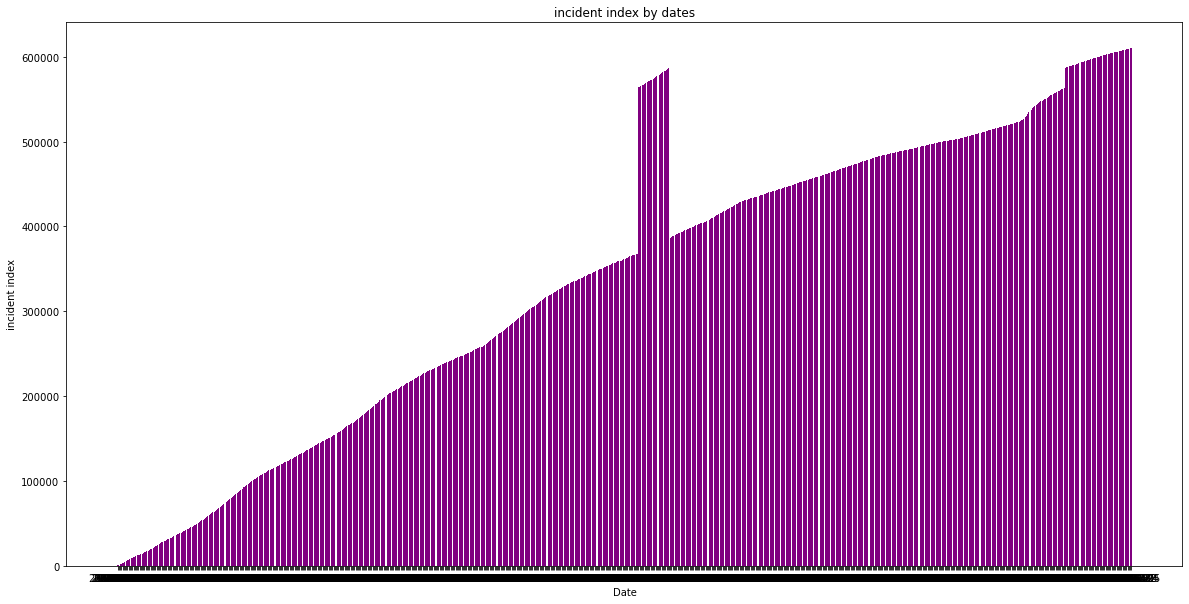

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.bar(df_copy.datetime,
       df_copy.index,
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="incident index",
       title="incident index by dates")

plt.show()

In [50]:
pd.crosstab(index = df_copy['index'] , columns = df_copy['Year'] , normalize = "index")

Year,2020,2021,2022
index,,,
0,0.539073,0.331440,0.129488
1,0.469324,0.298325,0.232351


Creating bar and wordcloud of top 20 words in the dataframe:

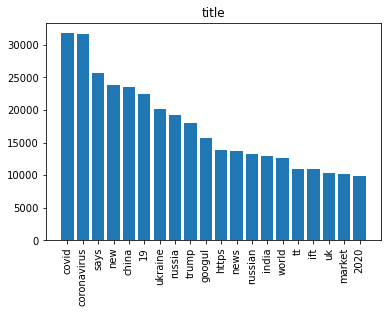

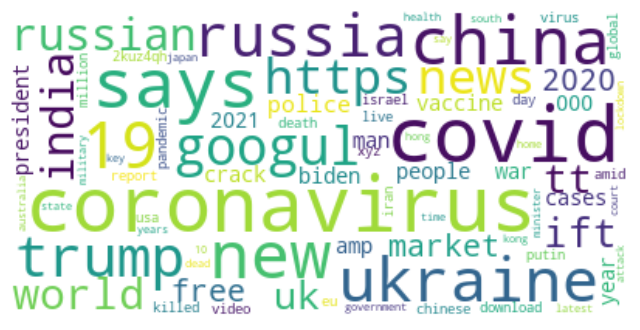

In [51]:
lines = []
for r in df_copy['title']:
    if type(r) is float:
        continue
    r = r.strip().lower()
    lines.append(r)
txt = " ".join(lines)
  
col = 'title'

vectorizer=CountVectorizer(stop_words="english")
freq_vec=vectorizer.fit_transform([txt]).toarray() 
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) 
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True))

top_val=20
plt.bar(list(freqDist.keys())[:top_val], list(freqDist.values())[:top_val])
plt.xticks(list(freqDist.keys())[:top_val], rotation='vertical')
plt.title(col)
plt.show()

# WordCloud

wordcloud = WordCloud(max_font_size=50, max_words=75, background_color="white").generate_from_frequencies(freqDist)
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

After cleaning the data, let's check it:

## Machine Learning
In this part I will use <b>NLP</b> - <b>N</b>atural <b>L</b>anguage <b>P</b>rocessing <br /> the main task of NLP would be to program computers for analyzing and processing huge amount of natural language data.

### Import Packeges:

In [55]:
nltk.download('stopwords')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from sklearn import preprocessing
from sklearn import metrics
from wordcloud import STOPWORDS
from sklearn.datasets import fetch_20newsgroups

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import sent_tokenize,word_tokenize

import warnings
warnings.filterwarnings('always') 

To start with the Machine learning part, I will create new dataframe contains 1 domain - bbc.com, because I received more than 400,000 rows, which is a lot to handle in this part. <br />
bbc.com is one of the largets domains in the Dataframe.

In [60]:
df = df_copy[df_copy['domain'] == 'bbc.com']
df.to_csv('./allnews_20_22_copy_BBC.csv')
len(df)

12353

Some visualization of the data:

C:\Users\Ron\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ron\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


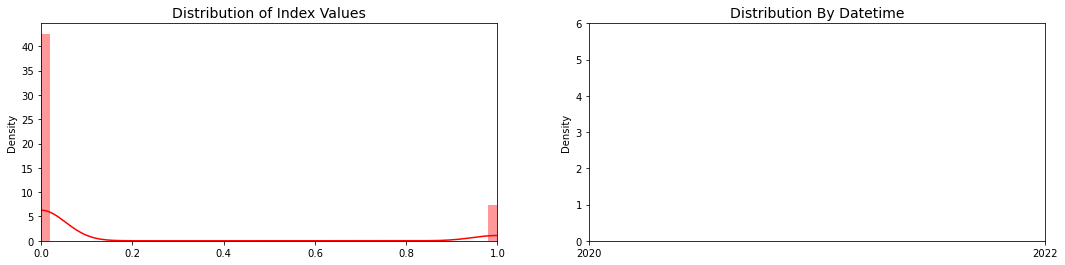

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['index'].values
time_val = df['Year'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Index Values', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot((time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution By Datetime', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Now, after creating the new dataframe we will start with the Machine Learning process:

In [63]:
df_train=pd.read_csv('./allnews_20_22_copy_BBC.csv')
df_test=pd.read_csv('./RedditAPI_news.csv')
df_test.head()

,title,score,id,subreddit,url,num_comments,body,created
0,/r/WorldNews Live Thread: Russian Invasion of ...,406,vjfcyr,worldnews,https://www.reddit.com/live/18hnzysb1elcs,483,NaN,24/06/2022 04:01
1,Biden administration announces $450 million in...,2880,vje81u,worldnews,https://www.cnn.com/2022/06/23/politics/biden-...,631,NaN,24/06/2022 02:58
2,American woman who had incomplete miscarriage ...,59207,vj5838,worldnews,https://www.cbsnews.com/news/andrea-prudente-i...,4418,NaN,23/06/2022 19:39
3,"Trudeau announces $250M in food aid, blames Ru...",3493,vjbfvv,worldnews,https://www.ctvnews.ca/canada/trudeau-announce...,348,NaN,24/06/2022 00:32
4,Ukraine and Moldova accepted as candidates to ...,7813,vj3vuw,worldnews,https://news.sky.com/story/ukraine-and-moldova...,281,NaN,23/06/2022 18:40


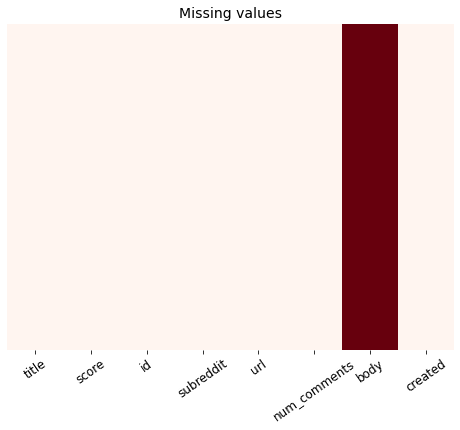

In [64]:
plt.figure(figsize = (8, 6))
sns.heatmap(df_test.isna(), yticklabels = False, cbar = False, cmap = 'Reds')
plt.title("Missing values", fontsize = 14)
plt.xticks(rotation = 35, fontsize = 12)
plt.show()

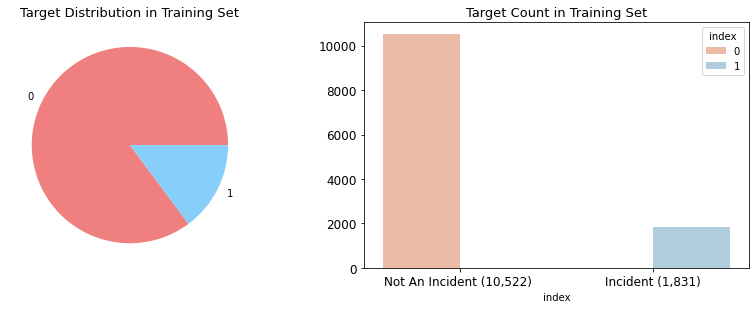

In [66]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
plt.tight_layout()

df_train.groupby('index').count()['id'].plot(kind='pie', ax=axes[0], labels=['0','1'],colors=['lightcoral','lightskyblue'])
sns.countplot(x=df_train['index'], hue=df_train['index'], ax=axes[1], palette="RdBu")

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not An Incident (10,522) ', 'Incident (1,831)'])
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

Here we can notice we have more 0 values - non incidents than 1 - incidents

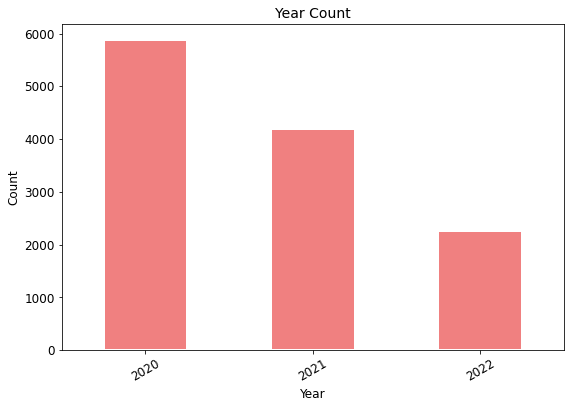

In [67]:
plt.figure(figsize = (9, 6))
ax = plt.axes()
ax.set_facecolor('white')
ax = ((df_train.Year.value_counts())[:10]).plot(kind = 'bar', color = 'lightcoral', linewidth = 2, edgecolor = 'white')
plt.title('Year Count', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 12, rotation = 30)
ax.yaxis.set_tick_params(labelsize = 12)

Now, we will compare and check foe common words in 'title' column:

In [68]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 50
INCIDENTS = df_train['index'] == 1
# Unigrams
incident_unigrams = defaultdict(int)
nonincident_unigrams = defaultdict(int)

for c in df_train[INCIDENTS]['title']:
    for word in generate_ngrams(c):
        incident_unigrams[word] += 1
        
for c in df_train[~INCIDENTS]['title']:
    for word in generate_ngrams(c):
        nonincident_unigrams[word] += 1

df_incident_unigrams = pd.DataFrame(sorted(incident_unigrams.items(), key=lambda x: x[1])[::-1])
df_nonincident_unigrams = pd.DataFrame(sorted(nonincident_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
incident_bigrams = defaultdict(int)
nonincident_bigrams = defaultdict(int)

for c in df_train[INCIDENTS]['title']:
    for word in generate_ngrams(c, n_gram=2):
        incident_bigrams[word] += 1
        
for c in df_train[~INCIDENTS]['title']:
    for word in generate_ngrams(c, n_gram=2):
        nonincident_bigrams[word] += 1
        
df_incident_bigrams = pd.DataFrame(sorted(incident_bigrams.items(), key=lambda x: x[1])[::-1])
df_nonincident_bigrams = pd.DataFrame(sorted(nonincident_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
incident_trigrams = defaultdict(int)
nonincident_trigrams = defaultdict(int)

for c in df_train[INCIDENTS]['title']:
    for word in generate_ngrams(c, n_gram=3):
        incident_trigrams[word] += 1
        
for c in df_train[~INCIDENTS]['title']:
    for word in generate_ngrams(c, n_gram=3):
        nonincident_trigrams[word] += 1
        
df_incident_trigrams = pd.DataFrame(sorted(incident_trigrams.items(), key=lambda x: x[1])[::-1])
df_nonincident_trigrams = pd.DataFrame(sorted(nonincident_trigrams.items(), key=lambda x: x[1])[::-1])

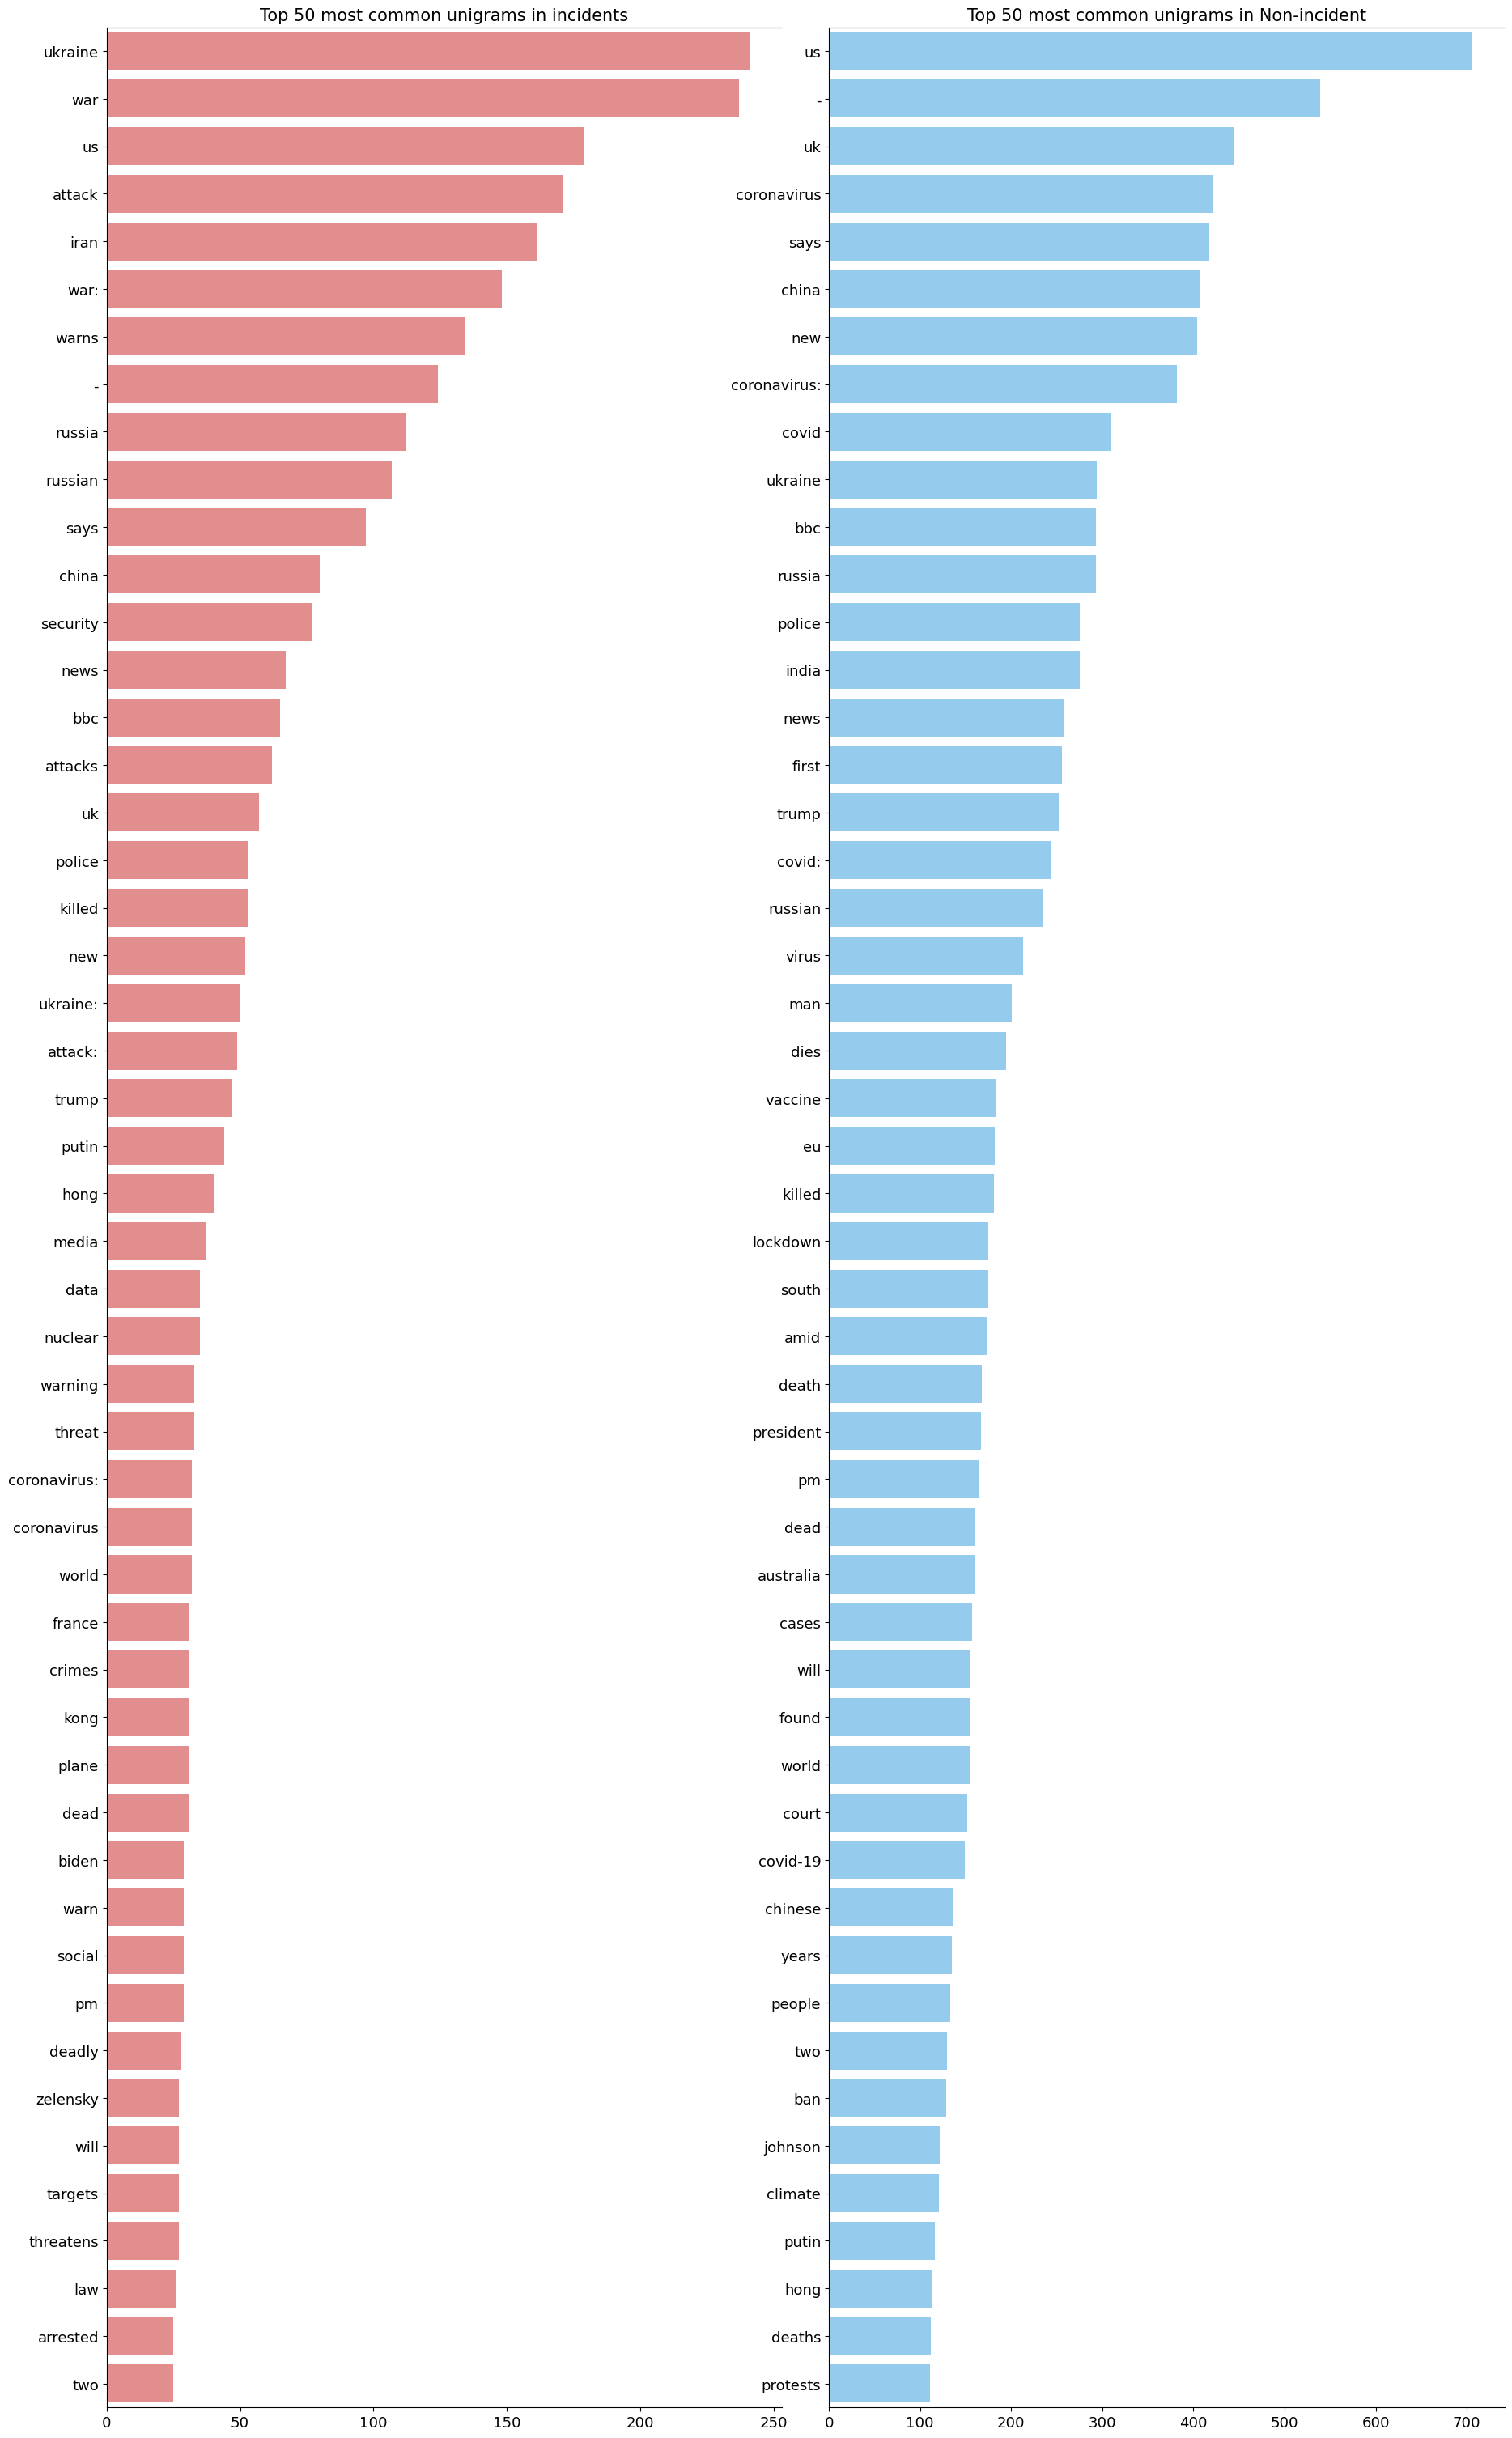

In [69]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_incident_unigrams[0].values[:N], x=df_incident_unigrams[1].values[:N], ax=axes[0], color='lightcoral')
sns.barplot(y=df_nonincident_unigrams[0].values[:N], x=df_nonincident_unigrams[1].values[:N], ax=axes[1], color='lightskyblue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in incidents', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-incident', fontsize=15)

plt.show()

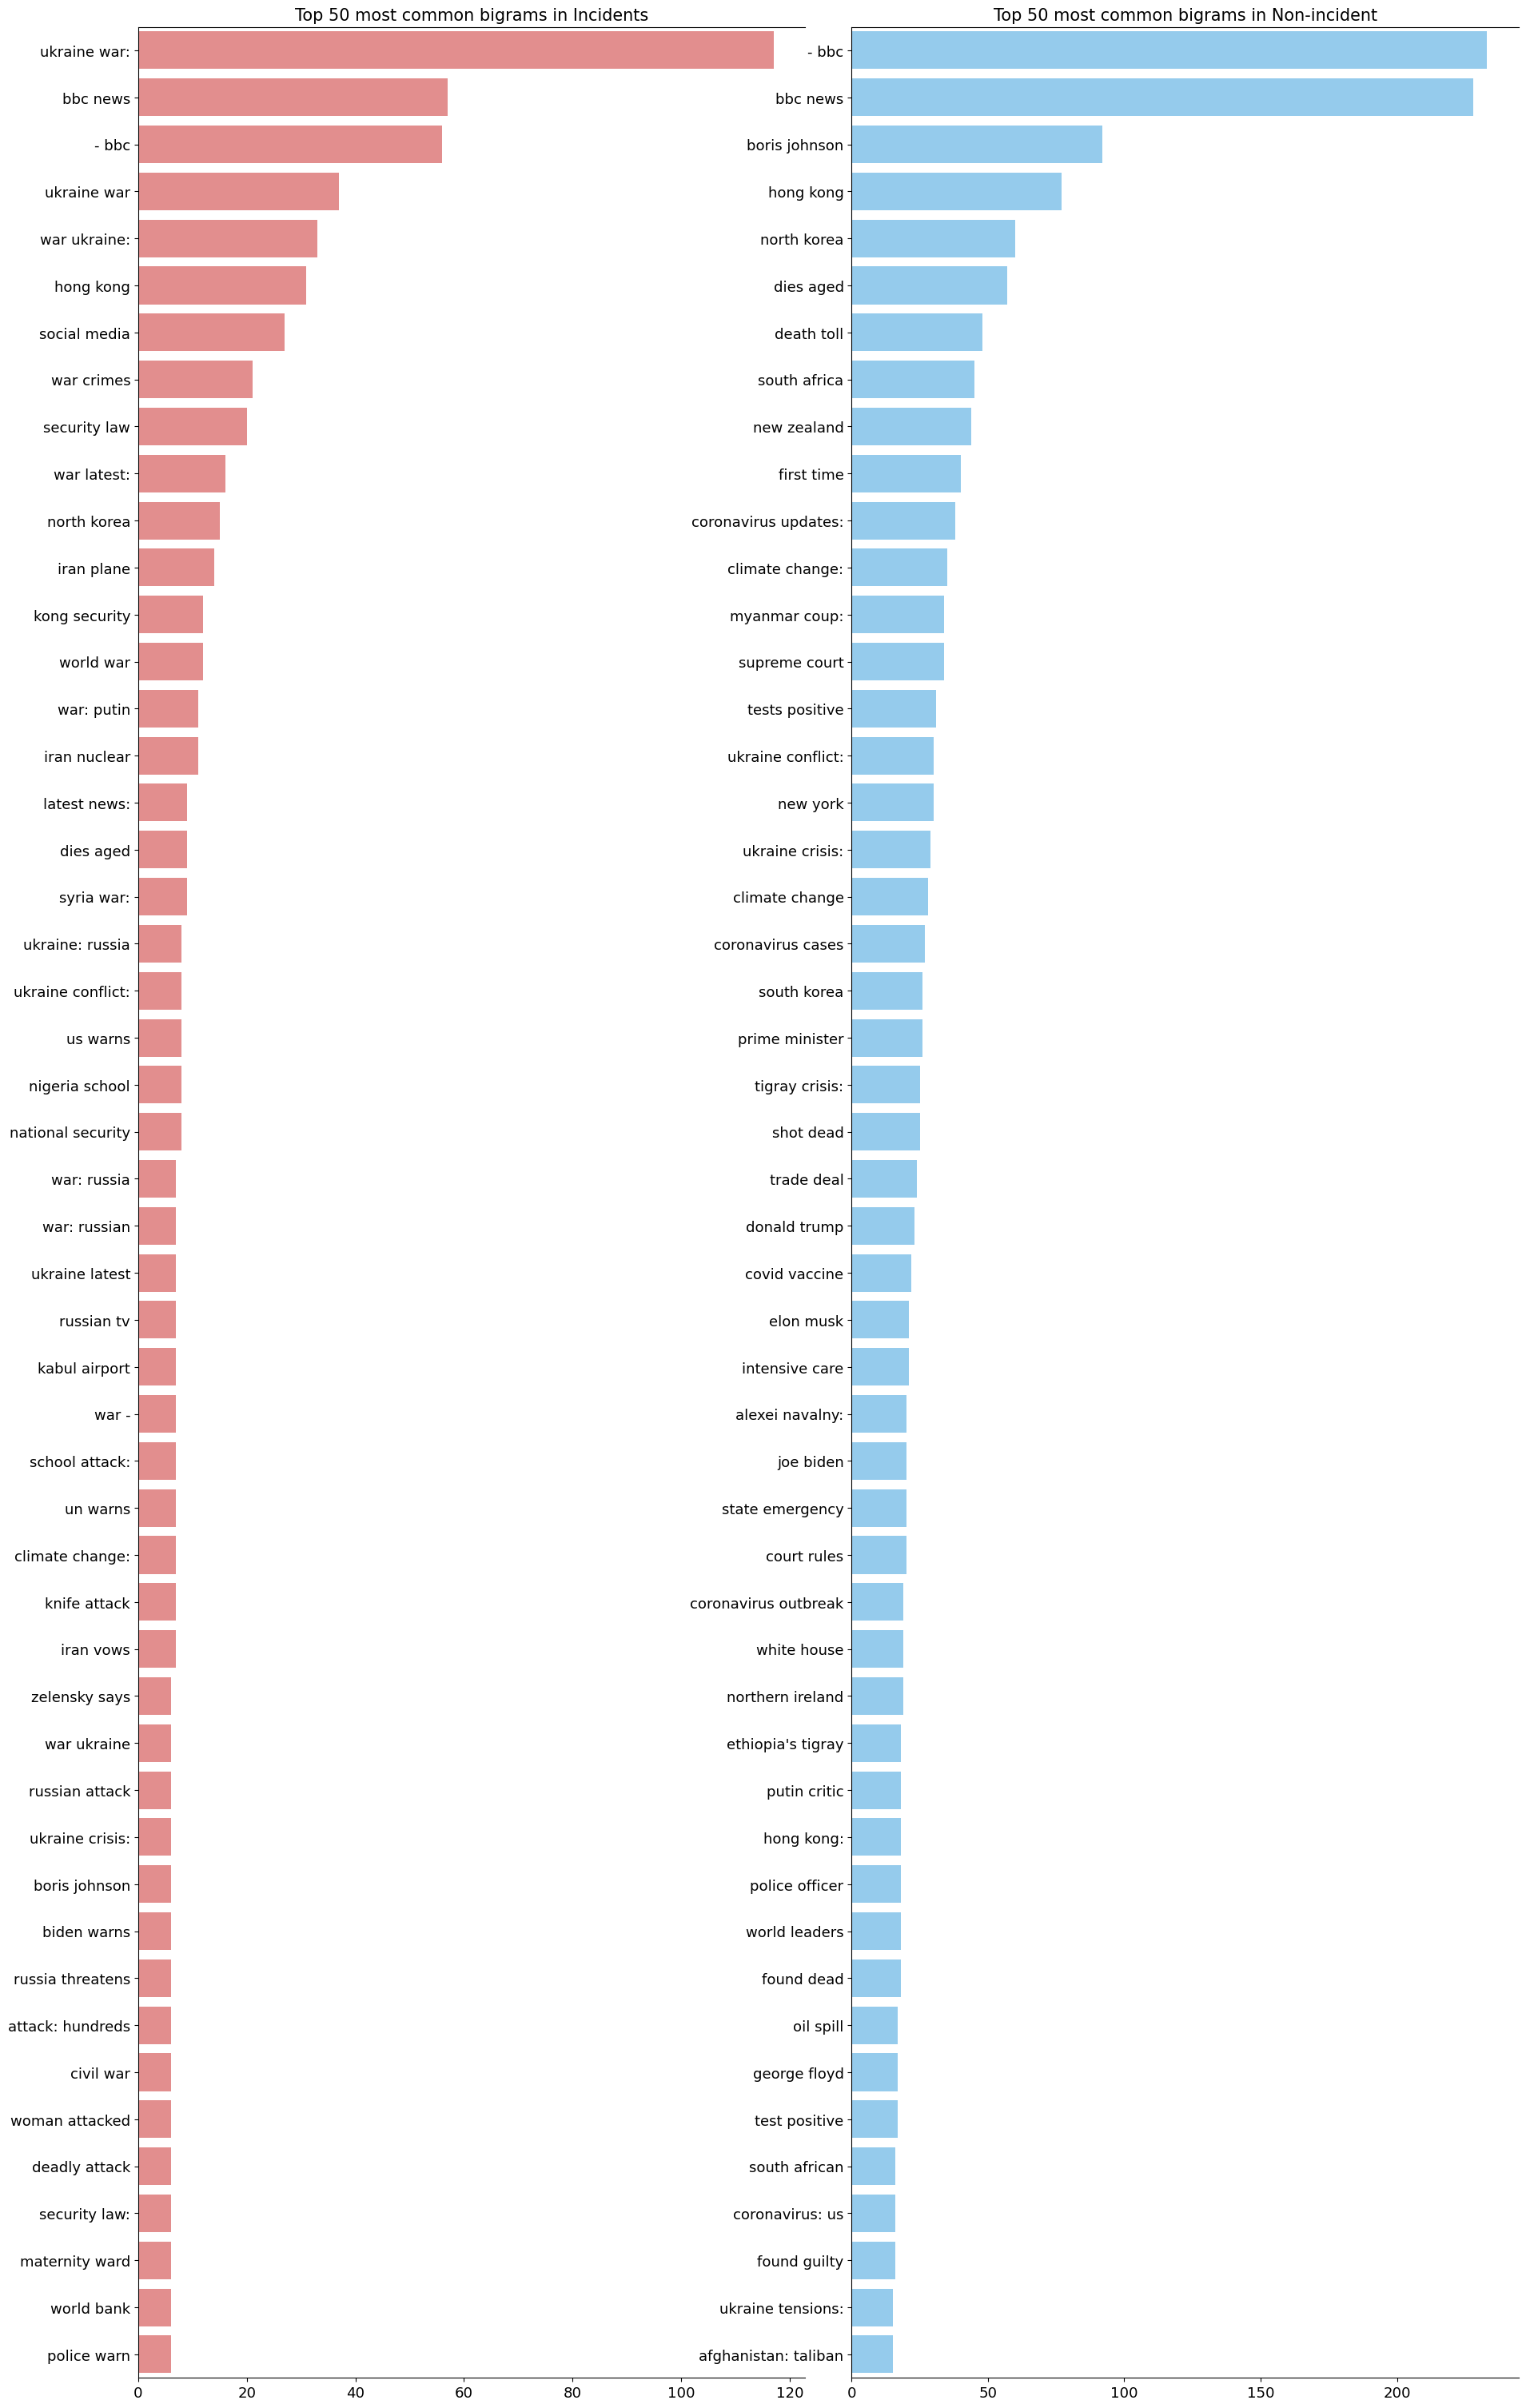

In [70]:
fig, axes = plt.subplots(ncols=2, figsize=(18,30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_incident_bigrams[0].values[:N], x=df_incident_bigrams[1].values[:N], ax=axes[0], color='lightcoral')
sns.barplot(y=df_nonincident_bigrams[0].values[:N], x=df_nonincident_bigrams[1].values[:N], ax=axes[1], color='lightskyblue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Incidents', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-incident', fontsize=15)

plt.show()

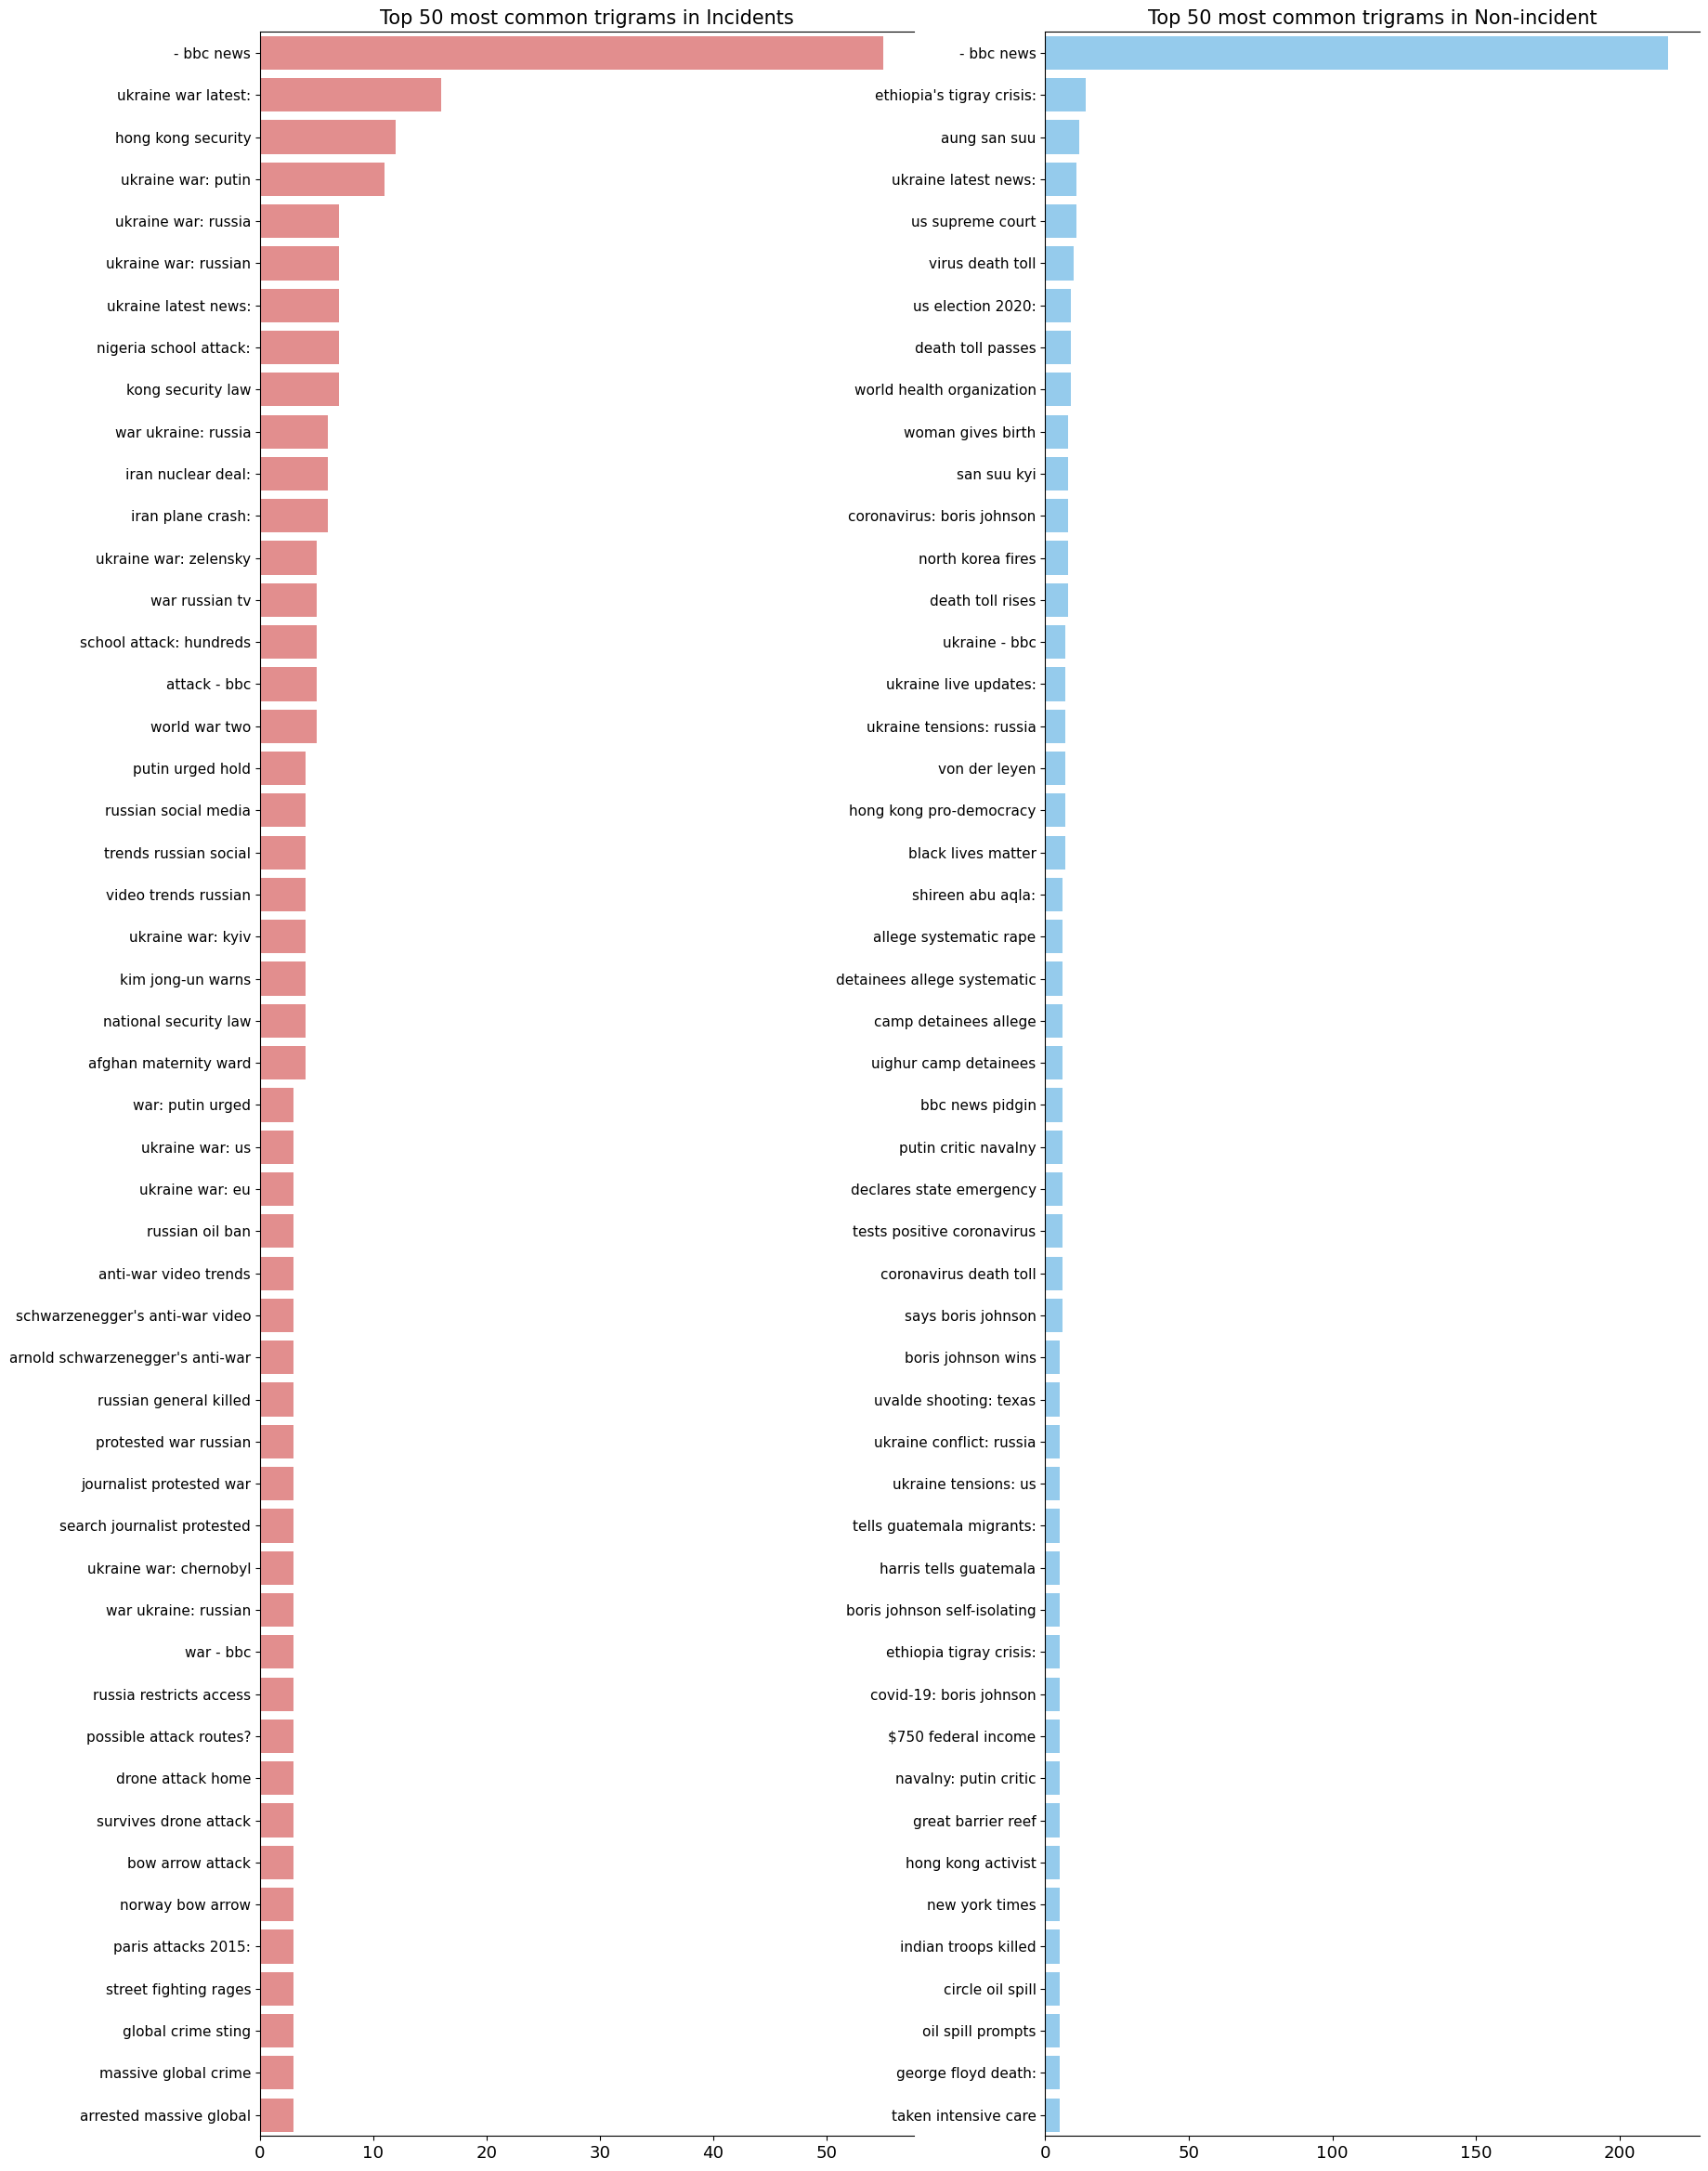

In [71]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 30), dpi=100)

sns.barplot(y=df_incident_trigrams[0].values[:N], x=df_incident_trigrams[1].values[:N], ax=axes[0], color='lightcoral')
sns.barplot(y=df_nonincident_trigrams[0].values[:N], x=df_nonincident_trigrams[1].values[:N], ax=axes[1], color='lightskyblue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Incidents', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-incident', fontsize=15)

plt.show()

In [72]:
df_mislabeled = df_train.groupby(['title']).nunique().sort_values(by='index', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['index'] > 0]['index']
df_mislabeled.index.tolist()

['"BDS Israel boycott group is anti-Semitic, says US"',
 "Pegasus: Spyware sold to governments 'targets activists'",
 "Peru clashes over President Vizcarra's impeachment",
 "Peru election: Fujimori's lead narrows as rural votes come in",
 'Peru election: Pedro Castillo gains last-minute lead',
 'Peru impeachment protests: Clashes with police with police turn deadly',
 "Peru oil spill after Tonga eruption an 'ecological disaster'",
 'Peru votes in unpredictable election for Congress',
 'Peru&amp;#x27;s President Merino resigns after deadly crackdown on protesters',
 "Peru's President Merino resigns after a deadly crackdown on protesters",
 "Peru's President Merino resigns after deadly crackdown on protesters",
 "Peru's chief of staff stashed $20,000 in palace bathroom",
 "Peru's court rules parliament dissolution legal",
 "Peru's ex-president shoots himself",
 'Peru: No serious irregularities in presidential run-off, say observers',
 'Peruvian President Resigns',
 'Peruvian President re

#### Data cleaning
Drop all columns except from title and index value, since it does not contain any valuable information

In [73]:
df_train=df_train.drop(['id','created','num_comments','Unnamed: 0','author','domain', 'url', 'datetime', 'char_count','word_count', 'Year'],1)

C:\Users\Ron\AppData\Local\Temp/ipykernel_15700/1047496225.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train=df_train.drop(['id','created','num_comments','Unnamed: 0','author','domain', 'url', 'datetime', 'char_count','word_count', 'Year'],1)


In [74]:
df_train.head()

,title,index
0,More than 200 homes burn down in latest bushfires,0
1,North Korea ends moratorium on nuclear testing,0
2,Palau is first country to ban 'toxic' sun cream,0
3,Australian fires kill seven and destroy homes,0
4,Vissel Kobe: Andres Iniesta &amp; Lukas Podols...,0


In [75]:
len(df_train)

12353

tokenizes the sentences and convert it to the lowercase and add those values to the list corpus

In [76]:
df_train.reset_index(drop=True)
corpus=[]
for i in range(0,(len(df_train)-1)):
    sentence= df_train['title'][i]
    tokens = nltk.wordpunct_tokenize(sentence)
    words = [w.lower() for w in tokens]
    corpus.append(words)

In [77]:
from pandas.core.common import flatten
wc=list(flatten(corpus))
wc[:10]

['more',
 'than',
 '200',
 'homes',
 'burn',
 'down',
 'in',
 'latest',
 'bushfires',
 'north']

In [78]:
dist = FreqDist(wc)
wordtotal=0
for word in dist.keys():
    wordtotal=wordtotal+ dist[word]

print("total words with punctuations:",wordtotal)
print("total unique words           :",len(dist))

total words with punctuations: 135120
total unique words           : 12824


In [79]:
import re
def alphaFreqDist (words):
    adist =FreqDist()
    pattern = re.compile('.*[^a-z].*')
    for word in words:
        if not pattern.match(word):
            adist[word] += 1
    return adist

adist= alphaFreqDist(wc)
wordtot=0
for word in adist.keys():
    wordtot=wordtot+ adist[word]

print("total words without punctuations:",wordtot)
print("total unique words              :",len(adist))

total words without punctuations: 115487
total unique words              : 12233


Removing stopwords from the corpus, using - nltk.download('stopwords')

In [80]:
from nltk.corpus import stopwords
without_stopwords_wc = [t for t in wc if not t in stopwords.words("english")]

In [81]:
def withoutStopwordsDist (words):
    wdist =FreqDist()
    pattern = re.compile('.*[^a-z].*')
    for word in words:
        if not pattern.match(word):
            wdist[word] += 1
    return wdist

wdist= withoutStopwordsDist(without_stopwords_wc)
without_sw=list(wdist.keys())
wordtotws=0
for word in wdist.keys():
    wordtotws=wordtotws+ wdist[word]

print("total words without stopwords   :",wordtotws)
print("total unique words              :",len(wdist))

total words without stopwords   : 88797
total unique words              : 12099


In [82]:
#lemmatization

lemmatizer = WordNetLemmatizer()
lemmawords=[]
for w in range(1,len(without_stopwords_wc)):
    lemmaword= lemmatizer.lemmatize(without_stopwords_wc[w-1])
    lemmawords.append(lemmaword)

In [83]:
def lemmaDist (words):
    ldist =FreqDist()
    pattern = re.compile('.*[^a-z].*')
    for word in words:
        if not pattern.match(word):
            ldist[word] += 1
    return ldist
ldist= lemmaDist(lemmawords)
wordtotle=0
for word in ldist.keys():
    wordtotle=wordtotle+ ldist[word]

print("total words lemmatized:",wordtotle)
print("total unique words    :",len(ldist))

total words lemmatized: 88796
total unique words    : 10685


Adding words count to the dataset. This can be used as feture to increase model accuracy later

In [84]:
df_train['wordscount'] = df_train['title'].apply(lambda x:len(str(x).split())) 
df_train['title']= [w.lower() for w in df_train['title']]
df_train.head()

,title,index,wordscount
0,more than 200 homes burn down in latest bushfires,0,9
1,north korea ends moratorium on nuclear testing,0,7
2,palau is first country to ban 'toxic' sun cream,0,9
3,australian fires kill seven and destroy homes,0,7
4,vissel kobe: andres iniesta &amp; lukas podols...,0,11


In [85]:
print('maximum number of words in a sentence :',max(df_train['wordscount']))
print('minimum number of words in a sentence :',min(df_train['wordscount']))

maximum number of words in a sentence : 27
minimum number of words in a sentence : 1


The function below removes stopwords from the title, then we apply function to remove stopwords from the dataframe column. <br />
After removing stop words then count the number of words in the title.

In [86]:
import string
def stopwordremover(review):
    stop_words = stopwords.words('english')
    review = review.split()
    review = " ".join([word for word in review if not word in stop_words])
    review = review.translate(str.maketrans('', '', string.punctuation))
    return review

df_train['title']= df_train['title'].apply(stopwordremover)
df_train['title']= [w.lower() for w in df_train['title']]
df_train['wordscount1'] = df_train['title'].apply(lambda x:len(str(x).split())) 
df_train.head()

,title,index,wordscount,wordscount1
0,200 homes burn latest bushfires,0,9,5
1,north korea ends moratorium nuclear testing,0,7,6
2,palau first country ban toxic sun cream,0,9,7
3,australian fires kill seven destroy homes,0,7,6
4,vissel kobe andres iniesta amp lukas podolski ...,0,11,11


In [87]:
print('maximum number of words in a sentence :',max(df_train['wordscount1']))
print('minimum number of words in a sentence :',min(df_train['wordscount1']))

maximum number of words in a sentence : 19
minimum number of words in a sentence : 1


First try to model those data only using words in the reviews. so to do that we can use vectorizor and tfidf vectorizor functions.

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['title'])
y=df_train['index']

#### Import more packeges:

In [90]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

#libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

Divide the dataset into train set and test set 

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [92]:
print(x_train.shape)
print(x_test.shape)

(9882, 13895)
(2471, 13895)


train accuracy: 0.9998988059097349 
 test accuracy: 0.9736948603804128


classification report for ridge classifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2103
           1       0.99      0.83      0.90       368

    accuracy                           0.97      2471
   macro avg       0.98      0.91      0.94      2471
weighted avg       0.97      0.97      0.97      2471



confusion matrix for ridge classifier


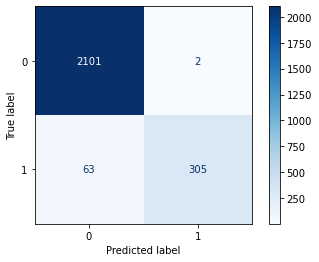

In [93]:
rc =RidgeClassifier()
model0=rc.fit(x_train, y_train)
print("train accuracy:",model0.score(x_train, y_train),"\n","test accuracy:",model0.score(x_test,y_test))

rcpred = rc.predict(x_test)
print("\n")
print("classification report for ridge classifier")
print(classification_report(y_test,rcpred))
print("\n")
print("confusion matrix for ridge classifier")
ConfusionMatrixDisplay.from_estimator(rc, x_test, y_test,cmap="Blues")

#### logistic regression

train accuracy: 0.9911961141469339 
 test accuracy: 0.9566976932416026


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2103
           1       1.00      0.71      0.83       368

    accuracy                           0.96      2471
   macro avg       0.98      0.85      0.90      2471
weighted avg       0.96      0.96      0.95      2471



confusion matrix for logistic regression


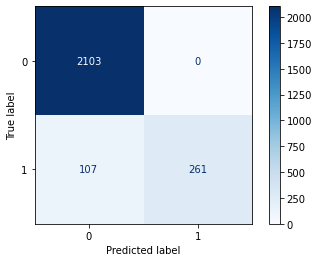

In [94]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(y_test,lrpred))
print("\n")
print("confusion matrix for logistic regression")
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test,cmap="Blues")

#### support vector machines


train accuracy: 1.0 
 test accuracy: 0.9821934439498179


classification report for support vector machines 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2103
           1       0.99      0.89      0.94       368

    accuracy                           0.98      2471
   macro avg       0.99      0.94      0.96      2471
weighted avg       0.98      0.98      0.98      2471



confusion matrix for support vector machines


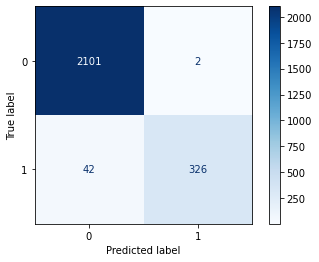

In [95]:
svm =LinearSVC()
model2=svm.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))
svmpred = svm.predict(x_test)
print("\n")
print("classification report for support vector machines ")
print(classification_report(y_test,svmpred))
print("\n")
print("confusion matrix for support vector machines")
ConfusionMatrixDisplay.from_estimator(svm, x_test, y_test,cmap="Blues")

#### Decision Tree Classifier


train accuracy: 1.0 
 test accuracy: 0.9919061108862809


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2103
           1       0.99      0.95      0.97       368

    accuracy                           0.99      2471
   macro avg       0.99      0.98      0.98      2471
weighted avg       0.99      0.99      0.99      2471



confusion matrix for decision tree classifier


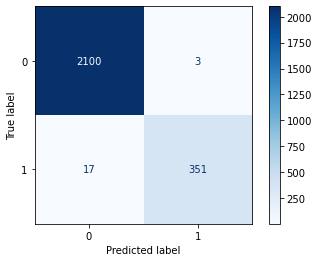

In [96]:
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))
dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(y_test,dtpred))
print("\n")
print("confusion matrix for decision tree classifier")
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test,cmap="Blues")

#### Random Forest Classifier


train accuracy: 1.0 
 test accuracy: 0.9825981384055038


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2103
           1       0.99      0.89      0.94       368

    accuracy                           0.98      2471
   macro avg       0.99      0.94      0.96      2471
weighted avg       0.98      0.98      0.98      2471



confusion matrix for random forest classifier


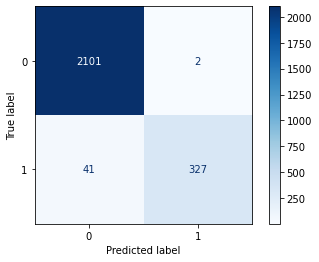

In [97]:
rf=RandomForestClassifier(random_state=1234)
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(y_test,rfpred))
print("\n")
print("confusion matrix for random forest classifier")
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test,cmap="Blues")

## Conclusion
According to the results our data is imbalanced :/ <br />
To predict such question we need to balance the dataset:
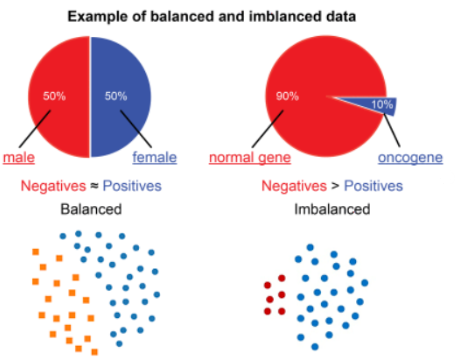 <br />
<br />
When we have a class imbalance, the machine learning classifier tends to be more biased towards the majority class (in our case - 0 index), which causing bad classification of the minority class (index 1) <br />
So, more then 90% of accuracy means we're predicting well only the majority class. <br />
For this reason, Precision and Recall are better measures in cases like this. 


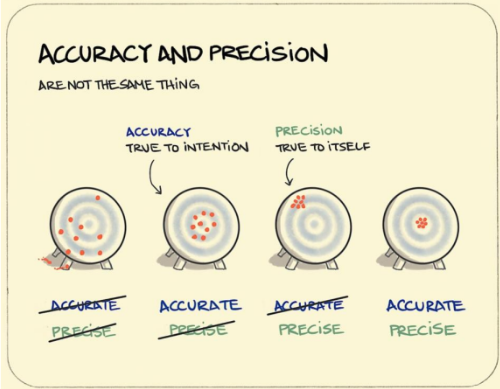

Let's discuss about the results. <br />
I wanted to predict cyber-attacks or searching for signs in case of attack. Let's take a look on the index column and count the number of 0 and 1 values, which points on the number of optional attack:

In [98]:
print('No Incident', round(df['index'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Incident', round(df['index'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Incident 85.18 % of the dataset
Incident 14.82 % of the dataset


C:\Users\Ron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No incident || 1: incident)')

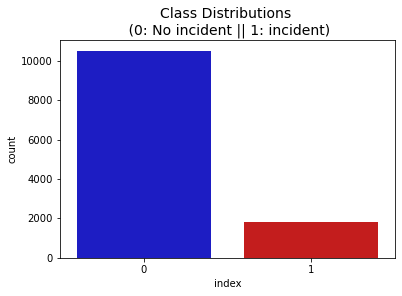

In [99]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('index', data=df, palette=colors)
plt.title('Class Distributions \n (0: No incident || 1: incident)', fontsize=14)

## Accuracy vs. Precision <br />
We received few Confusion martixs for the following algorithms: Logistic Regression, Support Vector, Decision Tree and Random Forest <br />
First see how it works by Model Assessment metrics: <br />
<br />
<b>Upper Left Square: </b>The amount of <b>correctly</b> classified by our model of no incident detection <br />
<b>Upper Right Square: </b>The amount of <b>incorrectly</b> classified news as incident cases, but the actual label is <b>no incident</b> <br />
<b>Lower Left Square: </b>The amount of <b>incorrectly</b> classified news as no incident cases, but the actual label is <b>incident</b> <br />
<b>Lower Right Square: </b>The amount of <b>correctly</b> classified by our model of incident detection <br />
<br />
Let's discuss about the difference between the models:

### Precision and Recall
Two key metrics that can be obtained from the confusion matrix for binary classification
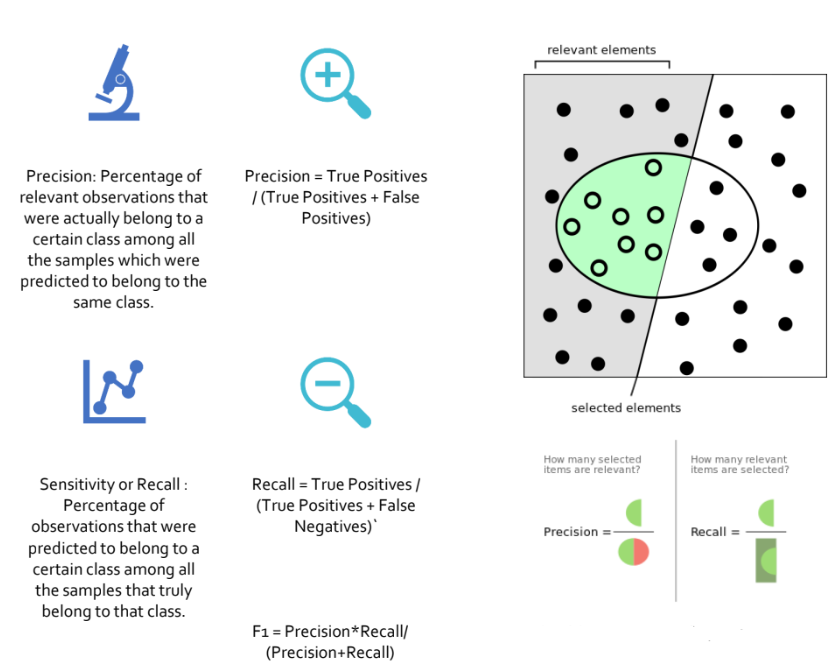
 
 In Logistic Regression (The False negative section in the Confusion matrix) we received 107, 98% accuracy 

### Recall and True negative rate
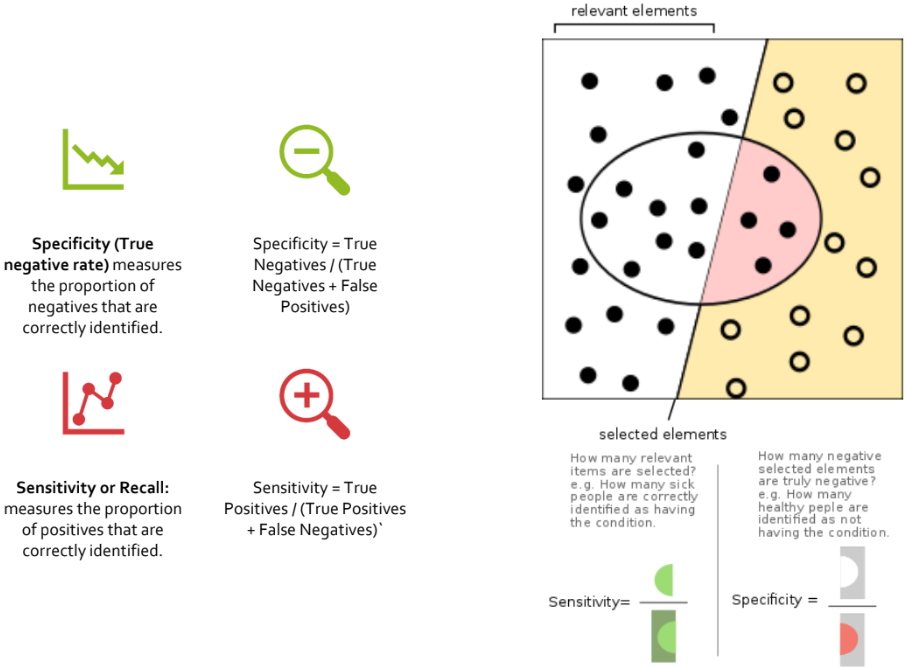

### Accuracy
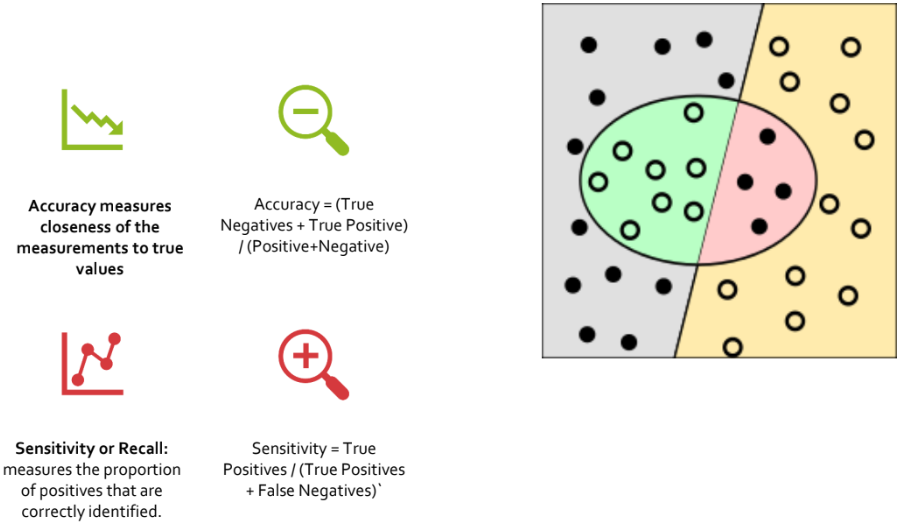

### ROC - Receiver Operaring Characteristic:
<b>ROC</b> shows the relationship between the recall and the True Negative Rate or <b>Specificity</b> <br />
The ideal point would be when we have a Recall of 1 and a <b>Specificity</b> of also 1 <br />
In that case we will be predicting all the True values - 1, and all the False values as False, but in practice we try to maximize the area under the ROC.

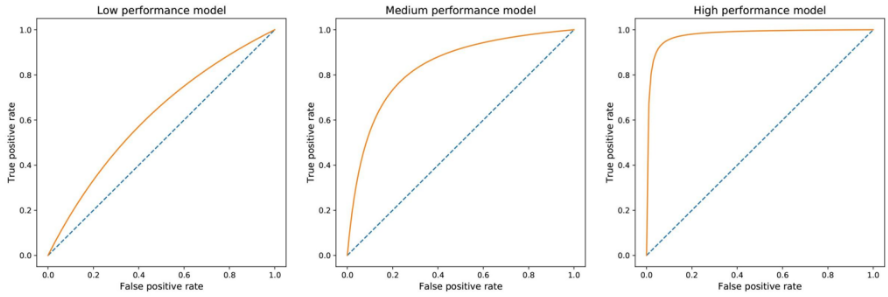

#### How this information is reflected in the project?
To balance our data and receive better results, we need to use F1-score and ROC instead of accuracy and upsample the minority - index 1, which is the number of cyber-attacks and downsample the majority - index 0. <br />
It means it costs sensitive learning of the data and using different techniques to make our dataset balanced: <br />

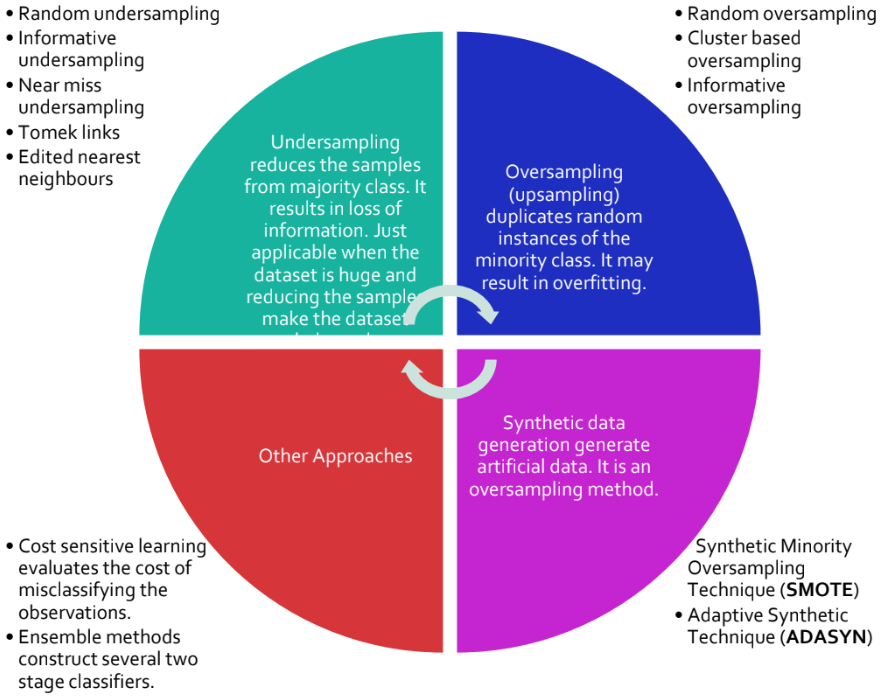

#### Credits:
Some of the function were taken from Kaggle: <br />
+ https://www.kaggle.com/code/sisharaneranjana/nlp-with-disaster-tweets